In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
Factor = 0.3894*1e6/137.035999074
def Get_weighted_average(value,error):
    #Factor=2841.438#((1/137)*0.3894*1e6)
    Factor = 0.3894*1e6/137.035999074
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        #print(i,value[i],error[i])
        sum_mean += value[i]/(error[i]*error[i])
        sum_sigma += 1/(error[i]*error[i])
    return Factor*sum_mean/sum_sigma,Factor*math.sqrt(1/sum_sigma)
def Get_weighted_average_phi(value,error):
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        #print(i,value[i],error[i])
        sum_mean += value[i]/(error[i]*error[i])
        sum_sigma += 1/(error[i]*error[i])
    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
sys=11
def Get_Sys_table(xl,pTl):
    if xl==0.25 and pTl==0:
        #Sys=[[11.9/100,9.1/100,11.5/100],[11.9/100,9.1/100,12.1/100],[11.9/100,9.33/100,12.7/100]]
        Sys=[[sys/100,sys/100,sys/100],[sys/100,sys/100,sys/100],[sys/100,sys/100,sys/100]]
        return Sys
    if xl==0.25 and pTl==0.2:
        #Sys=[[9.15/100,8.15/100,10.8/100],[9.15/100,8.15/100,11.4/100],[9.15/100,8.41/100,12/100]]
        Sys=[[sys/100,sys/100,sys/100],[sys/100,sys/100,sys/100],[sys/100,sys/100,sys/100]]
        return Sys
Factor_3xs=math.sqrt(5)

In [3]:
#df_1xs_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/output_default_1xs_x2_pip_stat0.dat',delim_whitespace=True)
df_1xs_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/output_default_1xs_x2_pim_stat0.dat',delim_whitespace=True)

df_1xs_zQ2xbjPhT.head()
#print(np.sort(df_1xs_zQ2xbjPhT['phih'].unique()))

,i,Ebeam,x,phih,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.275,-0.718951,0.308286,0.35,1.75,0.1,FUUT,0.08504,0.000953,0.0,0.0,neutron,pi+,solid,0.000953
1,1,11.0,0.275,-0.520023,0.308286,0.35,1.75,0.1,FUUT,0.08504,0.001096,0.0,0.0,neutron,pi+,solid,0.001096
2,2,11.0,0.275,0.311295,0.308286,0.35,1.75,0.1,FUUT,0.08504,0.000996,0.0,0.0,neutron,pi+,solid,0.000996
3,3,11.0,0.275,0.300445,0.308286,0.35,1.75,0.1,FUUT,0.08504,0.006236,0.0,0.0,neutron,pi+,solid,0.006236
4,4,11.0,0.275,0.998516,0.308286,0.35,1.75,0.1,FUUT,0.08504,0.001052,0.0,0.0,neutron,pi+,solid,0.001052


In [4]:
#df_3xs_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/output_default_3xs_x2_pip_stat0.dat',delim_whitespace=True)#it's actually stat0, this is for pip
df_3xs_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/output_default_3xs_x2_pim_stat0.dat',delim_whitespace=True)#it's actually stat0, this is for pip

df_3xs_zQ2xbjPhT.head()

,i,Ebeam,x,phih,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.125,-2.842849,0.48445,0.35,1.25,0.1,FUUT,0.217316,0.000995,0.0,0.0,neutron,pi+,solid,0.000995
1,1,11.0,0.125,-2.830942,0.48445,0.35,1.25,0.1,FUUT,0.217128,0.000952,0.0,0.0,neutron,pi+,solid,0.000952
2,2,11.0,0.125,-2.827864,0.48445,0.35,1.25,0.1,FUUT,0.217079,0.000970,0.0,0.0,neutron,pi+,solid,0.000970
3,3,11.0,0.125,-2.823136,0.48445,0.35,1.25,0.1,FUUT,0.217002,0.001461,0.0,0.0,neutron,pi+,solid,0.001461
4,4,11.0,0.125,-2.244161,0.48445,0.35,1.25,0.1,FUUT,0.199915,0.000987,0.0,0.0,neutron,pi+,solid,0.000987


In [5]:
PI = math.pi
print(PI)
z_cuts=[0.3,0.4,0.5,0.6]
#z_cuts=[0.3,0.35,0.4,0.45]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[1.5,2,2.5,3,4]
#Q2_cuts=[3,3.5,4,4.5,5]
#xbj_cuts=[0,0.25]
xbj_cuts=[0.25,0.5]
#PhT_cuts=[0,0.2]
PhT_cuts=[0.2,0.4]
#PhT_cuts=[0.4,0.6]
#phih_bins = [-3.14,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3.14]
phih_bins =[-PI,-4*PI/5,-3*PI/5,-2*PI/5,-PI/5,PI/5,2*PI/5,3*PI/5,4*PI/5,PI]
#phih_bins =[-PI,-0.9*PI,-0.8*PI,-0.7*PI,-0.6*PI,-0.5*PI,-0.4*PI,-0.3*PI,-0.2*PI,-0.1*PI,0,0.1*PI,0.2*PI,0.3*PI,0.4*PI,0.5*PI,0.6*PI,0.7*PI,0.8*PI,0.9*PI,PI]
df_1xs_zQ2=df_1xs_zQ2xbjPhT[(df_1xs_zQ2xbjPhT['Ebeam']==11.0)&(df_1xs_zQ2xbjPhT['x']>xbj_cuts[0])&(df_1xs_zQ2xbjPhT['x']<xbj_cuts[1])&(df_1xs_zQ2xbjPhT['pT']>PhT_cuts[0])&(df_1xs_zQ2xbjPhT['pT']<PhT_cuts[1])]
df_3xs_zQ2=df_3xs_zQ2xbjPhT[(df_3xs_zQ2xbjPhT['Ebeam']==11.0)&(df_3xs_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_zQ2xbjPhT['x']<xbj_cuts[1])&(df_3xs_zQ2xbjPhT['pT']>PhT_cuts[0])&(df_3xs_zQ2xbjPhT['pT']<PhT_cuts[1])]
Sys_table = Get_Sys_table(xbj_cuts[0],PhT_cuts[0])

3.141592653589793


In [6]:
print(Sys_table[2][2])

0.11


In [7]:
df_1xs_1_1 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[0]][df_1xs_zQ2['z']<z_cuts[1]][df_1xs_zQ2['Q2']>Q2_cuts[0]][df_1xs_zQ2['Q2']<Q2_cuts[1]]
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]))
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]['phih'].unique()))

28
28


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2668002078.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_1_1 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[0]][df_1xs_zQ2['z']<z_cuts[1]][df_1xs_zQ2['Q2']>Q2_cuts[0]][df_1xs_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2668002078.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_1_1 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[0]][df_1xs_zQ2['z']<z_cuts[1]][df_1xs_zQ2['Q2']>Q2_cuts[0]][df_1xs_zQ2['Q2']<Q2_cuts[1]]


In [8]:
df_3xs_1_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

386
386


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/1735272136.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/1735272136.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]


In [9]:
df_1xs_1_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[0]][df_1xs_zQ2['Q2']<Q2_cuts[1]]
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]))
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]['phih'].unique()))

28
28


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/187137021.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_1_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[0]][df_1xs_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/187137021.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_1_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[0]][df_1xs_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/187137021.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_1_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[0]][df_1xs_zQ2['Q2']<Q2_cuts[1]]


In [10]:
df_3xs_1_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

386
386


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/660959689.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/660959689.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/660959689.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]


In [11]:
df_1xs_1_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[0]][df_1xs_zQ2['Q2']<Q2_cuts[1]]
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]))
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]['phih'].unique()))

28
28


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2016405503.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_1_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[0]][df_1xs_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2016405503.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_1_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[0]][df_1xs_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2016405503.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_1_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[0]][df_1xs_zQ2['Q2']<Q2_cuts[1]]


In [12]:
df_3xs_1_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

386
386


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2130574157.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2130574157.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2130574157.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]


In [13]:
df_1xs_2_1 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[0]][df_1xs_zQ2['z']<z_cuts[1]][df_1xs_zQ2['Q2']>Q2_cuts[1]][df_1xs_zQ2['Q2']<Q2_cuts[2]]
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]))
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]['phih'].unique()))

28
28


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/4258856607.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_2_1 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[0]][df_1xs_zQ2['z']<z_cuts[1]][df_1xs_zQ2['Q2']>Q2_cuts[1]][df_1xs_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/4258856607.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_2_1 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[0]][df_1xs_zQ2['z']<z_cuts[1]][df_1xs_zQ2['Q2']>Q2_cuts[1]][df_1xs_zQ2['Q2']<Q2_cuts[2]]


In [14]:
df_3xs_2_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

386
386


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/38913910.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/38913910.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]


In [15]:
df_1xs_2_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[1]][df_1xs_zQ2['Q2']<Q2_cuts[2]]
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]))
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]['phih'].unique()))

28
28


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/957587887.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_2_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[1]][df_1xs_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/957587887.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_2_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[1]][df_1xs_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/957587887.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_2_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[1]][df_1xs_zQ2['Q2']<Q2_cuts[2]]


In [16]:
df_3xs_2_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

386
386


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/1303666535.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/1303666535.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/1303666535.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]


In [17]:
df_1xs_2_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[1]][df_1xs_zQ2['Q2']<Q2_cuts[2]]
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]))
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]['phih'].unique()))

28
28


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/614530096.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_2_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[1]][df_1xs_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/614530096.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_2_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[1]][df_1xs_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/614530096.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_2_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[1]][df_1xs_zQ2['Q2']<Q2_cuts[2]]


In [18]:
df_3xs_2_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

386
386


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2563255446.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2563255446.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2563255446.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]


In [19]:
df_1xs_3_1 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[0]][df_1xs_zQ2['z']<z_cuts[1]][df_1xs_zQ2['Q2']>Q2_cuts[2]][df_1xs_zQ2['Q2']<Q2_cuts[3]]
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]))
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]['phih'].unique()))

28
28


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2105384112.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_3_1 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[0]][df_1xs_zQ2['z']<z_cuts[1]][df_1xs_zQ2['Q2']>Q2_cuts[2]][df_1xs_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2105384112.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_3_1 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[0]][df_1xs_zQ2['z']<z_cuts[1]][df_1xs_zQ2['Q2']>Q2_cuts[2]][df_1xs_zQ2['Q2']<Q2_cuts[3]]


In [20]:
df_3xs_3_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

386
386


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/3731236058.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/3731236058.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]


In [21]:
df_1xs_3_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[2]][df_1xs_zQ2['Q2']<Q2_cuts[3]]
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]))
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]['phih'].unique()))

28
28


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2875546147.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_3_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[2]][df_1xs_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2875546147.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_3_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[2]][df_1xs_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2875546147.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_3_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[2]][df_1xs_zQ2['Q2']<Q2_cuts[3]]


In [22]:
df_3xs_3_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

386
386


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/4239354454.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/4239354454.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/4239354454.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]


In [23]:
df_1xs_3_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[2]][df_1xs_zQ2['Q2']<Q2_cuts[3]]
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]))
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]['phih'].unique()))

28
28


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/3204621015.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_3_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[2]][df_1xs_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/3204621015.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_3_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[2]][df_1xs_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/3204621015.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_3_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[2]][df_1xs_zQ2['Q2']<Q2_cuts[3]]


In [24]:
df_3xs_3_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

386
386


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/165647900.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/165647900.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/165647900.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]


In [25]:
df_1xs_4_1 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[0]][df_1xs_zQ2['z']<z_cuts[1]][df_1xs_zQ2['Q2']>Q2_cuts[3]][df_1xs_zQ2['Q2']<Q2_cuts[4]]
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]))
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]['phih'].unique()))

28
28


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/1080734928.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_4_1 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[0]][df_1xs_zQ2['z']<z_cuts[1]][df_1xs_zQ2['Q2']>Q2_cuts[3]][df_1xs_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/1080734928.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_4_1 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[0]][df_1xs_zQ2['z']<z_cuts[1]][df_1xs_zQ2['Q2']>Q2_cuts[3]][df_1xs_zQ2['Q2']<Q2_cuts[4]]


In [26]:
df_3xs_4_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

386
386


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2895693434.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2895693434.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]


In [27]:
df_1xs_4_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[3]][df_1xs_zQ2['Q2']<Q2_cuts[4]]
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]))
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]['phih'].unique()))

28
28


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/1416687606.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_4_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[3]][df_1xs_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/1416687606.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_4_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[3]][df_1xs_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/1416687606.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_4_2 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[1]][df_1xs_zQ2['z']<z_cuts[2]][df_1xs_zQ2['Q2']>Q2_cuts[3]][df_1xs_zQ2['Q2']<Q2_cuts[4]]


In [28]:
df_3xs_4_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

386
386


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2507560876.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2507560876.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2507560876.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]


In [29]:
df_1xs_4_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[3]][df_1xs_zQ2['Q2']<Q2_cuts[4]]
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]))
print(len(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]['phih'].unique()))

28
28


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/1020995793.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_4_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[3]][df_1xs_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/1020995793.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_4_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[3]][df_1xs_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/1020995793.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1xs_4_3 = df_1xs_zQ2[df_1xs_zQ2['z']>z_cuts[2]][df_1xs_zQ2['z']<z_cuts[3]][df_1xs_zQ2['Q2']>Q2_cuts[3]][df_1xs_zQ2['Q2']<Q2_cuts[4]]


In [30]:
df_3xs_4_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

386
386


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/1849816026.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/1849816026.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/1849816026.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]


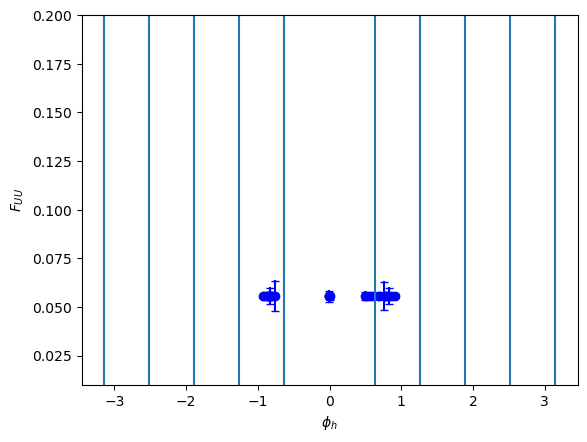

In [31]:
fig = plt.figure()
ax = fig.add_subplot()
phih_1_1 = df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]['phih']
Fuu_1_1 = df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0]['value']
for i_phih_1_1 in phih_1_1:
    Fuu_value = df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0][df_1xs_1_1['phih']==i_phih_1_1]['value']
    Fuu_stat = df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0][df_1xs_1_1['phih']==i_phih_1_1]['stat']
    #Fuu_1_1_sys.append(df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0][df_1xs_1_1['phih']==i_phih_1_1]['systabs'])
    ax.plot([i_phih_1_1,i_phih_1_1],[Fuu_value-Fuu_stat,Fuu_value+Fuu_stat],color='blue',marker='_')
plt.plot(phih_1_1,Fuu_1_1,'bo',label='Eb=11GeV')
phih_1_1_sorted = df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0].sort_values(by=['phih'])['phih']
Fuu_1_1_sys = df_1xs_1_1[df_1xs_1_1['Ebeam']==11.0].sort_values(by=['phih'])['error']
#ax.fill_between(phih_1_1_sorted,np.asarray(0.01)-np.asarray(Fuu_1_1_sys),np.asarray(0.01)+np.asarray(Fuu_1_1_sys),color='blue',alpha=0.25,linewidth=0,label='sys err')

phih_1_1_Eb2 = df_1xs_1_1[df_1xs_1_1['Ebeam']==8.8]['phih']
Fuu_1_1_Eb2 = df_1xs_1_1[df_1xs_1_1['Ebeam']==8.8]['value']
for i_phih_1_1_Eb2 in phih_1_1_Eb2:
    Fuu_value = df_1xs_1_1[df_1xs_1_1['Ebeam']==8.8][df_1xs_1_1['phih']==i_phih_1_1_Eb2]['value']
    Fuu_stat = df_1xs_1_1[df_1xs_1_1['Ebeam']==8.8][df_1xs_1_1['phih']==i_phih_1_1_Eb2]['stat']
    ax.plot([i_phih_1_1_Eb2,i_phih_1_1_Eb2],[Fuu_value-Fuu_stat,Fuu_value+Fuu_stat],color='blue',marker='_')
plt.plot(phih_1_1_Eb2,Fuu_1_1_Eb2,'bo',label='Eb=8.8GeV')
phih_1_1_Eb2_sorted = df_1xs_1_1[df_1xs_1_1['Ebeam']==8.8].sort_values(by=['phih'])['phih']
Fuu_1_1_Eb2_sys = df_1xs_1_1[df_1xs_1_1['Ebeam']==8.8].sort_values(by=['phih'])['error']
#ax.fill_between(phih_1_1_Eb2_sorted,np.asarray(0.01)-np.asarray(Fuu_1_1_Eb2_sys),np.asarray(0.01)+np.asarray(Fuu_1_1_Eb2_sys),color='blue',alpha=0.25,linewidth=0,label='sys err')

plt.xlabel('$\phi_h$')
plt.ylabel('$F_{UU}$')
plt.ylim(0.01,0.2)
#plt.yscale('log')
for i_phih in phih_bins:
    plt.axvline(x=i_phih)
plt.savefig('../Unpol_proposal/Materials/phi.pdf')


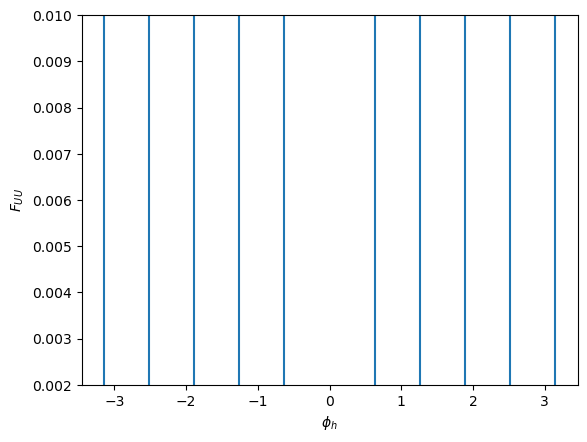

In [32]:
fig = plt.figure()
ax = fig.add_subplot()
phih_4_1 = df_1xs_4_1[df_1xs_4_1['Ebeam']==11.0]['phih']
Fuu_4_1 = df_1xs_4_1[df_1xs_4_1['Ebeam']==11.0]['value']
for i_phih_4_1 in phih_4_1:
    Fuu_value = df_1xs_4_1[df_1xs_4_1['Ebeam']==11.0][df_1xs_4_1['phih']==i_phih_4_1]['value']
    Fuu_stat = df_1xs_4_1[df_1xs_4_1['Ebeam']==11.0][df_1xs_4_1['phih']==i_phih_4_1]['stat']
    #Fuu_4_1_sys.append(df_1xs_4_1[df_1xs_4_1['Ebeam']==11.0][df_1xs_4_1['phih']==i_phih_4_1]['systabs'])
    ax.plot([i_phih_4_1,i_phih_4_1],[Fuu_value-Fuu_stat,Fuu_value+Fuu_stat],color='blue',marker='_')
plt.plot(phih_4_1,Fuu_4_1,'bo',label='Eb=11GeV')
phih_4_1_sorted = df_1xs_4_1[df_1xs_4_1['Ebeam']==11.0].sort_values(by=['phih'])['phih']
Fuu_4_1_sys = df_1xs_4_1[df_1xs_4_1['Ebeam']==11.0].sort_values(by=['phih'])['error']
#ax.fill_between(phih_4_1_sorted,np.asarray(0.01)-np.asarray(Fuu_4_1_sys),np.asarray(0.01)+np.asarray(Fuu_4_1_sys),color='blue',alpha=0.25,linewidth=0,label='sys err')

phih_4_1_Eb2 = df_1xs_4_1[df_1xs_4_1['Ebeam']==8.8]['phih']
Fuu_4_1_Eb2 = df_1xs_4_1[df_1xs_4_1['Ebeam']==8.8]['value']
for i_phih_4_1_Eb2 in phih_4_1_Eb2:
    Fuu_value = df_1xs_4_1[df_1xs_4_1['Ebeam']==8.8][df_1xs_4_1['phih']==i_phih_4_1_Eb2]['value']
    Fuu_stat = df_1xs_4_1[df_1xs_4_1['Ebeam']==8.8][df_1xs_4_1['phih']==i_phih_4_1_Eb2]['stat']
    ax.plot([i_phih_4_1_Eb2,i_phih_4_1_Eb2],[Fuu_value-Fuu_stat,Fuu_value+Fuu_stat],color='blue',marker='_')
plt.plot(phih_4_1_Eb2,Fuu_4_1_Eb2,'bo',label='Eb=8.8GeV')
phih_4_1_Eb2_sorted = df_1xs_4_1[df_1xs_4_1['Ebeam']==8.8].sort_values(by=['phih'])['phih']
Fuu_4_1_Eb2_sys = df_1xs_4_1[df_1xs_4_1['Ebeam']==8.8].sort_values(by=['phih'])['error']
#ax.fill_between(phih_4_1_Eb2_sorted,np.asarray(0.01)-np.asarray(Fuu_4_1_Eb2_sys),np.asarray(0.01)+np.asarray(Fuu_4_1_Eb2_sys),color='blue',alpha=0.25,linewidth=0,label='sys err')

plt.xlabel('$\phi_h$')
plt.ylabel('$F_{UU}$')
plt.ylim(0.002,0.01)
#plt.yscale('log')
for i_phih in phih_bins:
    plt.axvline(x=i_phih)
plt.savefig('../Unpol_proposal/Materials/phi.pdf')


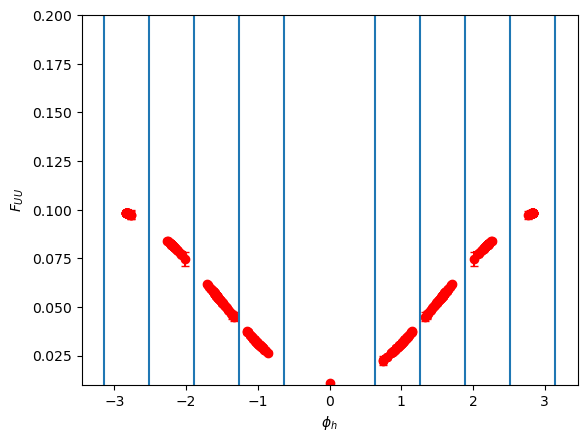

In [33]:
fig = plt.figure()
ax = fig.add_subplot()
phih_1_1 = df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih']
Fuu_1_1 = df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['value']
for i_phih_1_1 in phih_1_1:
    Fuu_value = df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0][df_3xs_1_1['phih']==i_phih_1_1]['value']
    Fuu_stat = df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0][df_3xs_1_1['phih']==i_phih_1_1]['stat']
    #Fuu_1_1_sys.append(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0][df_3xs_1_1['phih']==i_phih_1_1]['systabs'])
    ax.plot([i_phih_1_1,i_phih_1_1],[Fuu_value-Fuu_stat,Fuu_value+Fuu_stat],color='red',marker='_')
plt.plot(phih_1_1,Fuu_1_1,'ro',label='Eb=11GeV')
phih_1_1_sorted = df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0].sort_values(by=['phih'])['phih']
Fuu_1_1_sys = df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0].sort_values(by=['phih'])['error']
#ax.fill_between(phih_1_1_sorted,np.asarray(0.01)-np.asarray(Fuu_1_1_sys),np.asarray(0.01)+np.asarray(Fuu_1_1_sys),color='blue',alpha=0.25,linewidth=0,label='sys err')

phih_1_1_Eb2 = df_3xs_1_1[df_3xs_1_1['Ebeam']==8.8]['phih']
Fuu_1_1_Eb2 = df_3xs_1_1[df_3xs_1_1['Ebeam']==8.8]['value']
for i_phih_1_1_Eb2 in phih_1_1_Eb2:
    Fuu_value = df_3xs_1_1[df_3xs_1_1['Ebeam']==8.8][df_3xs_1_1['phih']==i_phih_1_1_Eb2]['value']
    Fuu_stat = df_3xs_1_1[df_3xs_1_1['Ebeam']==8.8][df_3xs_1_1['phih']==i_phih_1_1_Eb2]['stat']
    ax.plot([i_phih_1_1_Eb2,i_phih_1_1_Eb2],[Fuu_value-Fuu_stat,Fuu_value+Fuu_stat],color='red',marker='_')
plt.plot(phih_1_1_Eb2,Fuu_1_1_Eb2,'ro',label='Eb=8.8GeV')
phih_1_1_Eb2_sorted = df_3xs_1_1[df_3xs_1_1['Ebeam']==8.8].sort_values(by=['phih'])['phih']
Fuu_1_1_Eb2_sys = df_3xs_1_1[df_3xs_1_1['Ebeam']==8.8].sort_values(by=['phih'])['error']
#ax.fill_between(phih_1_1_Eb2_sorted,np.asarray(0.01)-np.asarray(Fuu_1_1_Eb2_sys),np.asarray(0.01)+np.asarray(Fuu_1_1_Eb2_sys),color='blue',alpha=0.25,linewidth=0,label='sys err')

plt.xlabel('$\phi_h$')
plt.ylabel('$F_{UU}$')
plt.ylim(0.01,0.2)
#plt.yscale('log')
for i_phih in phih_bins:
    plt.axvline(x=i_phih)
plt.savefig('../Unpol_proposal/Materials/3xs_phi.pdf')


-3.141592653589793 -2.5132741228718345
0
-2.5132741228718345 -1.8849555921538759
0
-1.8849555921538759 -1.2566370614359172
0
-1.2566370614359172 -0.6283185307179586
11
-0.6283185307179586 0.6283185307179586
8
0.6283185307179586 1.2566370614359172
9
1.2566370614359172 1.8849555921538759
0
1.8849555921538759 2.5132741228718345
0
2.5132741228718345 3.141592653589793
0


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/690917321.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_1_1s = df_1xs_1_1[df_1xs_1_1['phih']>=i_phi_left][df_1xs_1_1['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/690917321.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_1_1s = df_1xs_1_1[df_1xs_1_1['phih']>=i_phi_left][df_1xs_1_1['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/690917321.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_1_1_stats = df_1xs_1_1[df_1xs_1_1['phih']>=i_phi_left][df_1xs_1_1['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/690917321.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_1_1s = df_1xs_1_1[df_1xs_1_1['phih']>=i_phi_left][df_1xs_1_1[

Text(0, 0.5, '$F_{UU}$')

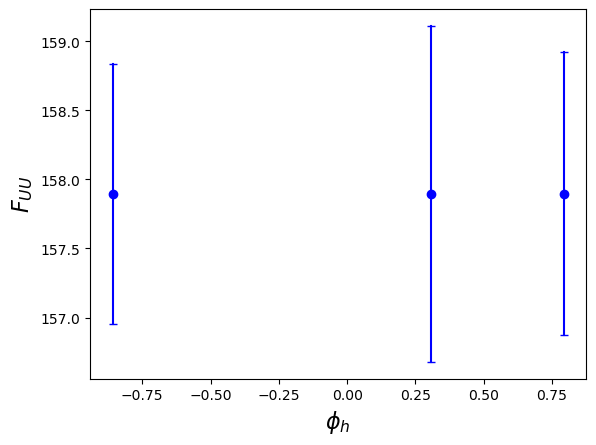

In [34]:
fig = plt.figure()
ax = fig.add_subplot()
phih_1_1=[]
Fuu_1_1=[]
Fuu_1_1_stat=[]
Fuu_1_1_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_1_1s = df_1xs_1_1[df_1xs_1_1['phih']>=i_phi_left][df_1xs_1_1['phih']<i_phi]['phih'].tolist()
    Fuu_1_1s = df_1xs_1_1[df_1xs_1_1['phih']>=i_phi_left][df_1xs_1_1['phih']<i_phi]['value'].tolist()
    Fuu_1_1_stats = df_1xs_1_1[df_1xs_1_1['phih']>=i_phi_left][df_1xs_1_1['phih']<i_phi]['stat'].tolist()
    print(len(phih_1_1s))
    
    if len(phih_1_1s)>0:  
        #print('phih',phih_1_1s)
        #print('Fuu',Fuu_1_1s)
        #print('Fuu_stat',Fuu_1_1_stats)
        _Fuu_1_1 = Get_weighted_average(Fuu_1_1s,Fuu_1_1_stats)[0]
        _Fuu_1_1_stat = Get_weighted_average(Fuu_1_1s,Fuu_1_1_stats)[1]
        _phih_1_1= Get_weighted_average_phi(phih_1_1s,Fuu_1_1_stats)[0]
        #print('_Fuu_1_1',_Fuu_1_1)
        #print('_phih',_phih_1_1)
        #print('_Fuu_stat',_Fuu_1_1_stat)
        Fuu_1_1.append(_Fuu_1_1)
        phih_1_1.append(_phih_1_1)
        Fuu_1_1_stat.append(_Fuu_1_1_stat)
        Fuu_1_1_sys.append(Sys_table[0][0]*_Fuu_1_1)
        #print(Fuu_1_1,phih_1_1)
        ax.plot([_phih_1_1,_phih_1_1],[_Fuu_1_1-_Fuu_1_1_stat,_Fuu_1_1+_Fuu_1_1_stat],color='blue',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_1_1,Fuu_1_1,'bo')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.5132741228718345
0
-2.5132741228718345 -1.8849555921538759
0
-1.8849555921538759 -1.2566370614359172
0
-1.2566370614359172 -0.6283185307179586
8
-0.6283185307179586 0.6283185307179586
9
0.6283185307179586 1.2566370614359172
5
1.2566370614359172 1.8849555921538759
0
1.8849555921538759 2.5132741228718345
0
2.5132741228718345 3.141592653589793
0


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2884387368.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_1_2s = df_1xs_1_2[df_1xs_1_2['phih']>=i_phi_left][df_1xs_1_2['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2884387368.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_1_2s = df_1xs_1_2[df_1xs_1_2['phih']>=i_phi_left][df_1xs_1_2['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2884387368.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_1_2_stats = df_1xs_1_2[df_1xs_1_2['phih']>=i_phi_left][df_1xs_1_2['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2884387368.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_1_2s = df_1xs_1_2[df_1xs_1_2['phih']>=i_phi_left][df_1xs_

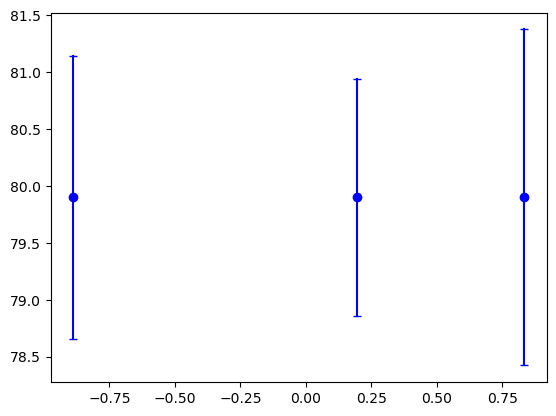

In [35]:
fig = plt.figure()
ax = fig.add_subplot()
phih_1_2=[]
Fuu_1_2=[]
Fuu_1_2_stat=[]
Fuu_1_2_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_1_2s = df_1xs_1_2[df_1xs_1_2['phih']>=i_phi_left][df_1xs_1_2['phih']<i_phi]['phih'].tolist()
    Fuu_1_2s = df_1xs_1_2[df_1xs_1_2['phih']>=i_phi_left][df_1xs_1_2['phih']<i_phi]['value'].tolist()
    Fuu_1_2_stats = df_1xs_1_2[df_1xs_1_2['phih']>=i_phi_left][df_1xs_1_2['phih']<i_phi]['stat'].tolist()
    print(len(phih_1_2s))
    
    if len(phih_1_2s)>0:  
        #print('phih',phih_1_2s)
        #print('Fuu',Fuu_1_2s)
        #print('Fuu_stat',Fuu_1_2_stats)
        _Fuu_1_2 = Get_weighted_average(Fuu_1_2s,Fuu_1_2_stats)[0]
        _Fuu_1_2_stat = Get_weighted_average(Fuu_1_2s,Fuu_1_2_stats)[1]
        _phih_1_2= Get_weighted_average_phi(phih_1_2s,Fuu_1_2_stats)[0]
        #print('_Fuu_1_2',_Fuu_1_2)
        #print('_phih',_phih_1_2)
        #print('_Fuu_stat',_Fuu_1_2_stat)
        Fuu_1_2.append(_Fuu_1_2)
        phih_1_2.append(_phih_1_2)
        Fuu_1_2_stat.append(_Fuu_1_2_stat)
        Fuu_1_2_sys.append(Sys_table[0][1]*_Fuu_1_2)
        #print(Fuu_1_2,phih_1_2)
        ax.plot([_phih_1_2,_phih_1_2],[_Fuu_1_2-_Fuu_1_2_stat,_Fuu_1_2+_Fuu_1_2_stat],color='blue',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_1_2,Fuu_1_2,'bo')

-3.141592653589793 -2.5132741228718345
0
-2.5132741228718345 -1.8849555921538759
0
-1.8849555921538759 -1.2566370614359172
0
-1.2566370614359172 -0.6283185307179586
3
-0.6283185307179586 0.6283185307179586
8
0.6283185307179586 1.2566370614359172
3
1.2566370614359172 1.8849555921538759
0
1.8849555921538759 2.5132741228718345
0
2.5132741228718345 3.141592653589793
0


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2565403742.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_1_3s = df_1xs_1_3[df_1xs_1_3['phih']>=i_phi_left][df_1xs_1_3['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2565403742.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_1_3s = df_1xs_1_3[df_1xs_1_3['phih']>=i_phi_left][df_1xs_1_3['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2565403742.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_1_3_stats = df_1xs_1_3[df_1xs_1_3['phih']>=i_phi_left][df_1xs_1_3['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2565403742.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_1_3s = df_1xs_1_3[df_1xs_1_3['phih']>=i_phi_left][df_1xs_

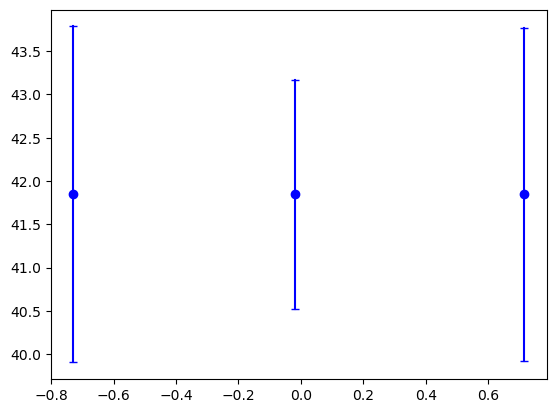

In [36]:
fig = plt.figure()
ax = fig.add_subplot()
phih_1_3=[]
Fuu_1_3=[]
Fuu_1_3_stat=[]
Fuu_1_3_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_1_3s = df_1xs_1_3[df_1xs_1_3['phih']>=i_phi_left][df_1xs_1_3['phih']<i_phi]['phih'].tolist()
    Fuu_1_3s = df_1xs_1_3[df_1xs_1_3['phih']>=i_phi_left][df_1xs_1_3['phih']<i_phi]['value'].tolist()
    Fuu_1_3_stats = df_1xs_1_3[df_1xs_1_3['phih']>=i_phi_left][df_1xs_1_3['phih']<i_phi]['stat'].tolist()
    print(len(phih_1_3s))
    
    if len(phih_1_3s)>0:  
        #print('phih',phih_1_3s)
        #print('Fuu',Fuu_1_3s)
        #print('Fuu_stat',Fuu_1_3_stats)
        _Fuu_1_3 = Get_weighted_average(Fuu_1_3s,Fuu_1_3_stats)[0]
        _Fuu_1_3_stat = Get_weighted_average(Fuu_1_3s,Fuu_1_3_stats)[1]
        _phih_1_3= Get_weighted_average_phi(phih_1_3s,Fuu_1_3_stats)[0]
        #print('_Fuu_1_3',_Fuu_1_3)
        #print('_phih',_phih_1_3)
        #print('_Fuu_stat',_Fuu_1_3_stat)
        Fuu_1_3.append(_Fuu_1_3)
        phih_1_3.append(_phih_1_3)
        Fuu_1_3_stat.append(_Fuu_1_3_stat)
        Fuu_1_3_sys.append(Sys_table[0][2]*_Fuu_1_3)
        #print(Fuu_1_3,phih_1_3)
        ax.plot([_phih_1_3,_phih_1_3],[_Fuu_1_3-_Fuu_1_3_stat,_Fuu_1_3+_Fuu_1_3_stat],color='blue',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_1_3,Fuu_1_3,'bo')

-3.141592653589793 -2.5132741228718345
0
-2.5132741228718345 -1.8849555921538759
0
-1.8849555921538759 -1.2566370614359172
4
-1.2566370614359172 -0.6283185307179586
29
-0.6283185307179586 0.6283185307179586
12
0.6283185307179586 1.2566370614359172
29
1.2566370614359172 1.8849555921538759
5
1.8849555921538759 2.5132741228718345
0
2.5132741228718345 3.141592653589793
0


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/1848739742.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_2_1s = df_1xs_2_1[df_1xs_2_1['phih']>=i_phi_left][df_1xs_2_1['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/1848739742.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_2_1s = df_1xs_2_1[df_1xs_2_1['phih']>=i_phi_left][df_1xs_2_1['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/1848739742.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_2_1_stats = df_1xs_2_1[df_1xs_2_1['phih']>=i_phi_left][df_1xs_2_1['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/1848739742.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_2_1s = df_1xs_2_1[df_1xs_2_1['phih']>=i_phi_left][df_1xs_

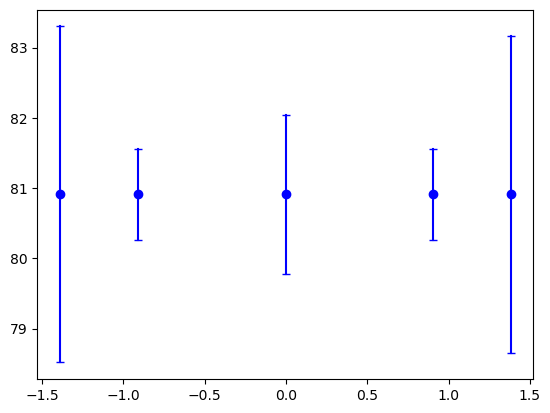

In [37]:
fig = plt.figure()
ax = fig.add_subplot()
phih_2_1=[]
Fuu_2_1=[]
Fuu_2_1_stat=[]
Fuu_2_1_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_2_1s = df_1xs_2_1[df_1xs_2_1['phih']>=i_phi_left][df_1xs_2_1['phih']<i_phi]['phih'].tolist()
    Fuu_2_1s = df_1xs_2_1[df_1xs_2_1['phih']>=i_phi_left][df_1xs_2_1['phih']<i_phi]['value'].tolist()
    Fuu_2_1_stats = df_1xs_2_1[df_1xs_2_1['phih']>=i_phi_left][df_1xs_2_1['phih']<i_phi]['stat'].tolist()
    print(len(phih_2_1s))
    
    if len(phih_2_1s)>0:  
        #print('phih',phih_2_1s)
        #print('Fuu',Fuu_2_1s)
        #print('Fuu_stat',Fuu_2_1_stats)
        _Fuu_2_1 = Get_weighted_average(Fuu_2_1s,Fuu_2_1_stats)[0]
        _Fuu_2_1_stat = Get_weighted_average(Fuu_2_1s,Fuu_2_1_stats)[1]
        _phih_2_1= Get_weighted_average_phi(phih_2_1s,Fuu_2_1_stats)[0]
        #print('_Fuu_2_1',_Fuu_2_1)
        #print('_phih',_phih_2_1)
        #print('_Fuu_stat',_Fuu_2_1_stat)
        Fuu_2_1.append(_Fuu_2_1)
        phih_2_1.append(_phih_2_1)
        Fuu_2_1_stat.append(_Fuu_2_1_stat)
        Fuu_2_1_sys.append(Sys_table[1][0]*_Fuu_2_1)
        #print(Fuu_2_1,phih_2_1)
        ax.plot([_phih_2_1,_phih_2_1],[_Fuu_2_1-_Fuu_2_1_stat,_Fuu_2_1+_Fuu_2_1_stat],color='blue',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_2_1,Fuu_2_1,'bo')

-3.141592653589793 -2.5132741228718345
0
-2.5132741228718345 -1.8849555921538759
0
-1.8849555921538759 -1.2566370614359172
0
-1.2566370614359172 -0.6283185307179586
24
-0.6283185307179586 0.6283185307179586
23
0.6283185307179586 1.2566370614359172
21
1.2566370614359172 1.8849555921538759
5
1.8849555921538759 2.5132741228718345
0
2.5132741228718345 3.141592653589793
0


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/817337861.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_2_2s = df_1xs_2_2[df_1xs_2_2['phih']>=i_phi_left][df_1xs_2_2['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/817337861.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_2_2s = df_1xs_2_2[df_1xs_2_2['phih']>=i_phi_left][df_1xs_2_2['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/817337861.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_2_2_stats = df_1xs_2_2[df_1xs_2_2['phih']>=i_phi_left][df_1xs_2_2['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/817337861.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_2_2s = df_1xs_2_2[df_1xs_2_2['phih']>=i_phi_left][df_1xs_2_2[

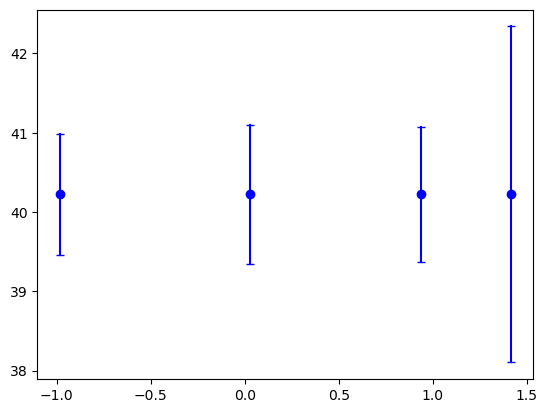

In [38]:
fig = plt.figure()
ax = fig.add_subplot()
phih_2_2=[]
Fuu_2_2=[]
Fuu_2_2_stat=[]
Fuu_2_2_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_2_2s = df_1xs_2_2[df_1xs_2_2['phih']>=i_phi_left][df_1xs_2_2['phih']<i_phi]['phih'].tolist()
    Fuu_2_2s = df_1xs_2_2[df_1xs_2_2['phih']>=i_phi_left][df_1xs_2_2['phih']<i_phi]['value'].tolist()
    Fuu_2_2_stats = df_1xs_2_2[df_1xs_2_2['phih']>=i_phi_left][df_1xs_2_2['phih']<i_phi]['stat'].tolist()
    print(len(phih_2_2s))
    
    if len(phih_2_2s)>0:  
        #print('phih',phih_2_2s)
        #print('Fuu',Fuu_2_2s)
        #print('Fuu_stat',Fuu_2_2_stats)
        _Fuu_2_2 = Get_weighted_average(Fuu_2_2s,Fuu_2_2_stats)[0]
        _Fuu_2_2_stat = Get_weighted_average(Fuu_2_2s,Fuu_2_2_stats)[1]
        _phih_2_2= Get_weighted_average_phi(phih_2_2s,Fuu_2_2_stats)[0]
        #print('_Fuu_2_2',_Fuu_2_2)
        #print('_phih',_phih_2_2)
        #print('_Fuu_stat',_Fuu_2_2_stat)
        Fuu_2_2.append(_Fuu_2_2)
        phih_2_2.append(_phih_2_2)
        Fuu_2_2_stat.append(_Fuu_2_2_stat)
        Fuu_2_2_sys.append(Sys_table[1][1]*_Fuu_2_2)
        #print(Fuu_2_2,phih_2_2)
        ax.plot([_phih_2_2,_phih_2_2],[_Fuu_2_2-_Fuu_2_2_stat,_Fuu_2_2+_Fuu_2_2_stat],color='blue',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_2_2,Fuu_2_2,'bo')

-3.141592653589793 -2.5132741228718345
0
-2.5132741228718345 -1.8849555921538759
0
-1.8849555921538759 -1.2566370614359172
0
-1.2566370614359172 -0.6283185307179586
10
-0.6283185307179586 0.6283185307179586
12
0.6283185307179586 1.2566370614359172
10
1.2566370614359172 1.8849555921538759
4
1.8849555921538759 2.5132741228718345
0
2.5132741228718345 3.141592653589793
0


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/1929653472.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_2_3s = df_1xs_2_3[df_1xs_2_3['phih']>=i_phi_left][df_1xs_2_3['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/1929653472.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_2_3s = df_1xs_2_3[df_1xs_2_3['phih']>=i_phi_left][df_1xs_2_3['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/1929653472.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_2_3_stats = df_1xs_2_3[df_1xs_2_3['phih']>=i_phi_left][df_1xs_2_3['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/1929653472.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_2_3s = df_1xs_2_3[df_1xs_2_3['phih']>=i_phi_left][df_1xs_

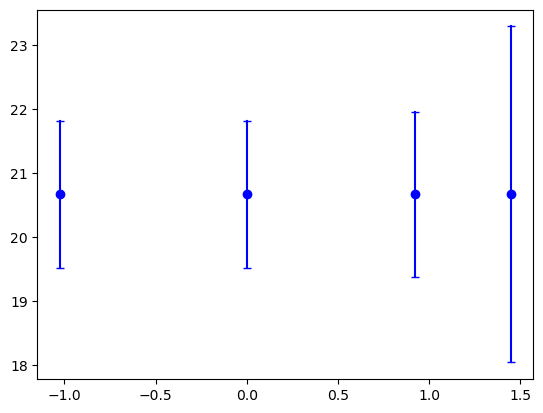

In [39]:
fig = plt.figure()
ax = fig.add_subplot()
phih_2_3=[]
Fuu_2_3=[]
Fuu_2_3_stat=[]
Fuu_2_3_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_2_3s = df_1xs_2_3[df_1xs_2_3['phih']>=i_phi_left][df_1xs_2_3['phih']<i_phi]['phih'].tolist()
    Fuu_2_3s = df_1xs_2_3[df_1xs_2_3['phih']>=i_phi_left][df_1xs_2_3['phih']<i_phi]['value'].tolist()
    Fuu_2_3_stats = df_1xs_2_3[df_1xs_2_3['phih']>=i_phi_left][df_1xs_2_3['phih']<i_phi]['stat'].tolist()
    print(len(phih_2_3s))
    
    if len(phih_2_3s)>0:  
        #print('phih',phih_2_3s)
        #print('Fuu',Fuu_2_3s)
        #print('Fuu_stat',Fuu_2_3_stats)
        _Fuu_2_3 = Get_weighted_average(Fuu_2_3s,Fuu_2_3_stats)[0]
        _Fuu_2_3_stat = Get_weighted_average(Fuu_2_3s,Fuu_2_3_stats)[1]
        _phih_2_3= Get_weighted_average_phi(phih_2_3s,Fuu_2_3_stats)[0]
        #print('_Fuu_2_3',_Fuu_2_3)
        #print('_phih',_phih_2_3)
        #print('_Fuu_stat',_Fuu_2_3_stat)
        Fuu_2_3.append(_Fuu_2_3)
        phih_2_3.append(_phih_2_3)
        Fuu_2_3_stat.append(_Fuu_2_3_stat)
        Fuu_2_3_sys.append(Sys_table[1][2]*_Fuu_2_3)
        #print(Fuu_2_3,phih_2_3)
        ax.plot([_phih_2_3,_phih_2_3],[_Fuu_2_3-_Fuu_2_3_stat,_Fuu_2_3+_Fuu_2_3_stat],color='blue',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_2_3,Fuu_2_3,'bo')

-3.141592653589793 -2.5132741228718345
0
-2.5132741228718345 -1.8849555921538759
0
-1.8849555921538759 -1.2566370614359172
12
-1.2566370614359172 -0.6283185307179586
28
-0.6283185307179586 0.6283185307179586
12
0.6283185307179586 1.2566370614359172
29
1.2566370614359172 1.8849555921538759
11
1.8849555921538759 2.5132741228718345
2
2.5132741228718345 3.141592653589793
0


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/818043284.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_3_1s = df_1xs_3_1[df_1xs_3_1['phih']>=i_phi_left][df_1xs_3_1['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/818043284.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_3_1s = df_1xs_3_1[df_1xs_3_1['phih']>=i_phi_left][df_1xs_3_1['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/818043284.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_3_1_stats = df_1xs_3_1[df_1xs_3_1['phih']>=i_phi_left][df_1xs_3_1['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/818043284.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_3_1s = df_1xs_3_1[df_1xs_3_1['phih']>=i_phi_left][df_1xs_3_1[

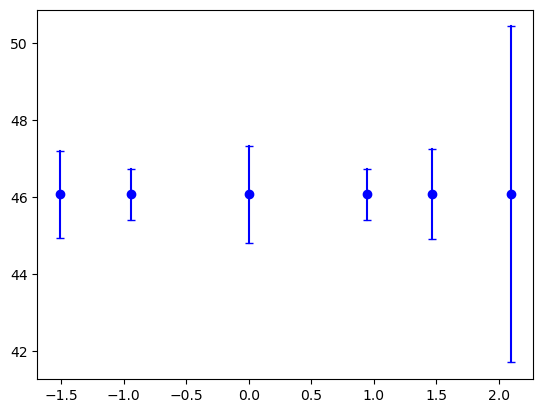

In [40]:
fig = plt.figure()
ax = fig.add_subplot()
phih_3_1=[]
Fuu_3_1=[]
Fuu_3_1_stat=[]
Fuu_3_1_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_3_1s = df_1xs_3_1[df_1xs_3_1['phih']>=i_phi_left][df_1xs_3_1['phih']<i_phi]['phih'].tolist()
    Fuu_3_1s = df_1xs_3_1[df_1xs_3_1['phih']>=i_phi_left][df_1xs_3_1['phih']<i_phi]['value'].tolist()
    Fuu_3_1_stats = df_1xs_3_1[df_1xs_3_1['phih']>=i_phi_left][df_1xs_3_1['phih']<i_phi]['stat'].tolist()
    print(len(phih_3_1s))
    
    if len(phih_3_1s)>0:  
        #print('phih',phih_3_1s)
        #print('Fuu',Fuu_3_1s)
        #print('Fuu_stat',Fuu_3_1_stats)
        _Fuu_3_1 = Get_weighted_average(Fuu_3_1s,Fuu_3_1_stats)[0]
        _Fuu_3_1_stat = Get_weighted_average(Fuu_3_1s,Fuu_3_1_stats)[1]
        _phih_3_1= Get_weighted_average_phi(phih_3_1s,Fuu_3_1_stats)[0]
        #print('_Fuu_3_1',_Fuu_3_1)
        #print('_phih',_phih_3_1)
        #print('_Fuu_stat',_Fuu_3_1_stat)
        Fuu_3_1.append(_Fuu_3_1)
        phih_3_1.append(_phih_3_1)
        Fuu_3_1_stat.append(_Fuu_3_1_stat)
        Fuu_3_1_sys.append(Sys_table[2][0]*_Fuu_3_1)
        #print(Fuu_3_1,phih_3_1)
        ax.plot([_phih_3_1,_phih_3_1],[_Fuu_3_1-_Fuu_3_1_stat,_Fuu_3_1+_Fuu_3_1_stat],color='blue',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_3_1,Fuu_3_1,'bo')

-3.141592653589793 -2.5132741228718345
0
-2.5132741228718345 -1.8849555921538759
0
-1.8849555921538759 -1.2566370614359172
14
-1.2566370614359172 -0.6283185307179586


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/3442591118.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_3_2s = df_1xs_3_2[df_1xs_3_2['phih']>=i_phi_left][df_1xs_3_2['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/3442591118.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_3_2s = df_1xs_3_2[df_1xs_3_2['phih']>=i_phi_left][df_1xs_3_2['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/3442591118.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_3_2_stats = df_1xs_3_2[df_1xs_3_2['phih']>=i_phi_left][df_1xs_3_2['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/3442591118.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_3_2s = df_1xs_3_2[df_1xs_3_2['phih']>=i_phi_left][df_1xs_

18
-0.6283185307179586 0.6283185307179586
17
0.6283185307179586 1.2566370614359172
18
1.2566370614359172 1.8849555921538759
11
1.8849555921538759 2.5132741228718345
4
2.5132741228718345 3.141592653589793
0


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/3442591118.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_3_2_stats = df_1xs_3_2[df_1xs_3_2['phih']>=i_phi_left][df_1xs_3_2['phih']<i_phi]['stat'].tolist()


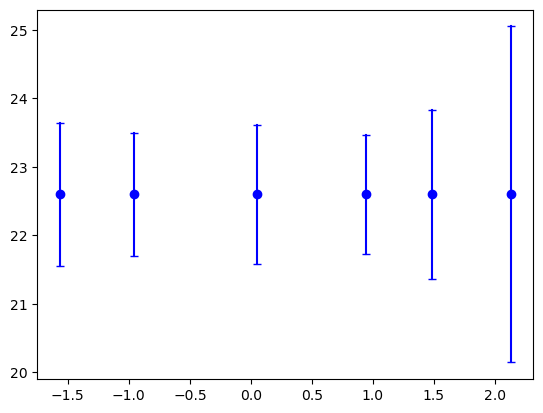

In [41]:
fig = plt.figure()
ax = fig.add_subplot()
phih_3_2=[]
Fuu_3_2=[]
Fuu_3_2_stat=[]
Fuu_3_2_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_3_2s = df_1xs_3_2[df_1xs_3_2['phih']>=i_phi_left][df_1xs_3_2['phih']<i_phi]['phih'].tolist()
    Fuu_3_2s = df_1xs_3_2[df_1xs_3_2['phih']>=i_phi_left][df_1xs_3_2['phih']<i_phi]['value'].tolist()
    Fuu_3_2_stats = df_1xs_3_2[df_1xs_3_2['phih']>=i_phi_left][df_1xs_3_2['phih']<i_phi]['stat'].tolist()
    print(len(phih_3_2s))
    
    if len(phih_3_2s)>0:  
        #print('phih',phih_3_2s)
        #print('Fuu',Fuu_3_2s)
        #print('Fuu_stat',Fuu_3_2_stats)
        _Fuu_3_2 = Get_weighted_average(Fuu_3_2s,Fuu_3_2_stats)[0]
        _Fuu_3_2_stat = Get_weighted_average(Fuu_3_2s,Fuu_3_2_stats)[1]
        _phih_3_2= Get_weighted_average_phi(phih_3_2s,Fuu_3_2_stats)[0]
        #print('_Fuu_3_2',_Fuu_3_2)
        #print('_phih',_phih_3_2)
        #print('_Fuu_stat',_Fuu_3_2_stat)
        Fuu_3_2.append(_Fuu_3_2)
        phih_3_2.append(_phih_3_2)
        Fuu_3_2_stat.append(_Fuu_3_2_stat)
        Fuu_3_2_sys.append(Sys_table[2][1]*_Fuu_3_2)
        #print(Fuu_3_2,phih_3_2)
        ax.plot([_phih_3_2,_phih_3_2],[_Fuu_3_2-_Fuu_3_2_stat,_Fuu_3_2+_Fuu_3_2_stat],color='blue',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_3_2,Fuu_3_2,'bo')

-3.141592653589793 -2.5132741228718345
0
-2.5132741228718345 -1.8849555921538759
2
-1.8849555921538759 -1.2566370614359172
5
-1.2566370614359172 -0.6283185307179586
9
-0.6283185307179586 0.6283185307179586
12
0.6283185307179586 1.2566370614359172
9
1.2566370614359172 1.8849555921538759
7
1.8849555921538759 2.5132741228718345
1
2.5132741228718345 3.141592653589793
0


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/647871308.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_3_3s = df_1xs_3_3[df_1xs_3_3['phih']>=i_phi_left][df_1xs_3_3['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/647871308.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_3_3s = df_1xs_3_3[df_1xs_3_3['phih']>=i_phi_left][df_1xs_3_3['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/647871308.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_3_3_stats = df_1xs_3_3[df_1xs_3_3['phih']>=i_phi_left][df_1xs_3_3['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/647871308.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_3_3s = df_1xs_3_3[df_1xs_3_3['phih']>=i_phi_left][df_1xs_3_3[

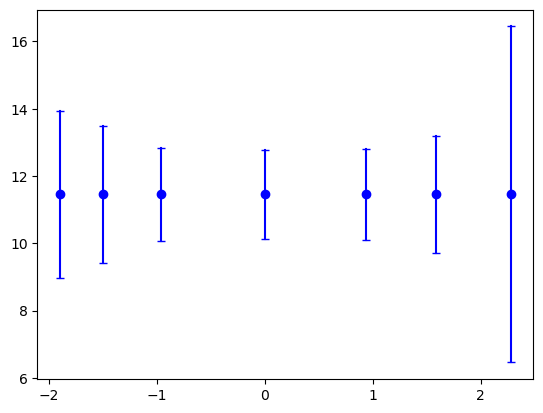

In [42]:
fig = plt.figure()
ax = fig.add_subplot()
phih_3_3=[]
Fuu_3_3=[]
Fuu_3_3_stat=[]
Fuu_3_3_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_3_3s = df_1xs_3_3[df_1xs_3_3['phih']>=i_phi_left][df_1xs_3_3['phih']<i_phi]['phih'].tolist()
    Fuu_3_3s = df_1xs_3_3[df_1xs_3_3['phih']>=i_phi_left][df_1xs_3_3['phih']<i_phi]['value'].tolist()
    Fuu_3_3_stats = df_1xs_3_3[df_1xs_3_3['phih']>=i_phi_left][df_1xs_3_3['phih']<i_phi]['stat'].tolist()
    print(len(phih_3_3s))
    
    if len(phih_3_3s)>0:  
        #print('phih',phih_3_3s)
        #print('Fuu',Fuu_3_3s)
        #print('Fuu_stat',Fuu_3_3_stats)
        _Fuu_3_3 = Get_weighted_average(Fuu_3_3s,Fuu_3_3_stats)[0]
        _Fuu_3_3_stat = Get_weighted_average(Fuu_3_3s,Fuu_3_3_stats)[1]
        _phih_3_3= Get_weighted_average_phi(phih_3_3s,Fuu_3_3_stats)[0]
        #print('_Fuu_3_3',_Fuu_3_3)
        #print('_phih',_phih_3_3)
        #print('_Fuu_stat',_Fuu_3_3_stat)
        Fuu_3_3.append(_Fuu_3_3)
        phih_3_3.append(_phih_3_3)
        Fuu_3_3_stat.append(_Fuu_3_3_stat)
        Fuu_3_3_sys.append(Sys_table[2][2]*_Fuu_3_3)
        #print(Fuu_3_3,phih_3_3)
        ax.plot([_phih_3_3,_phih_3_3],[_Fuu_3_3-_Fuu_3_3_stat,_Fuu_3_3+_Fuu_3_3_stat],color='blue',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_3_3,Fuu_3_3,'bo')

-3.141592653589793 -2.5132741228718345
0
-2.5132741228718345 -1.8849555921538759
0
-1.8849555921538759 -1.2566370614359172
0
-1.2566370614359172 -0.6283185307179586
0
-0.6283185307179586 0.6283185307179586
0
0.6283185307179586 1.2566370614359172
0
1.2566370614359172 1.8849555921538759
0
1.8849555921538759 2.5132741228718345
0
2.5132741228718345 3.141592653589793
0


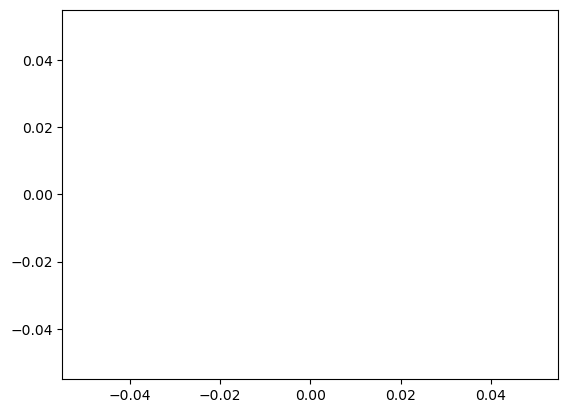

In [43]:
fig = plt.figure()
ax = fig.add_subplot()
phih_4_1=[]
Fuu_4_1=[]
Fuu_4_1_stat=[]
Fuu_4_1_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_4_1s = df_1xs_4_1[df_1xs_4_1['phih']>=i_phi_left][df_1xs_4_1['phih']<i_phi]['phih'].tolist()
    Fuu_4_1s = df_1xs_4_1[df_1xs_4_1['phih']>=i_phi_left][df_1xs_4_1['phih']<i_phi]['value'].tolist()
    Fuu_4_1_stats = df_1xs_4_1[df_1xs_4_1['phih']>=i_phi_left][df_1xs_4_1['phih']<i_phi]['stat'].tolist()
    print(len(phih_4_1s))
    
    if len(phih_4_1s)>0:  
        #print('phih',phih_4_1s)
        #print('Fuu',Fuu_4_1s)
        #print('Fuu_stat',Fuu_4_1_stats)
        _Fuu_4_1 = Get_weighted_average(Fuu_4_1s,Fuu_4_1_stats)[0]
        _Fuu_4_1_stat = Get_weighted_average(Fuu_4_1s,Fuu_4_1_stats)[1]
        _phih_4_1= Get_weighted_average_phi(phih_4_1s,Fuu_4_1_stats)[0]
        #print('_Fuu_4_1',_Fuu_4_1)
        #print('_phih',_phih_4_1)
        #print('_Fuu_stat',_Fuu_4_1_stat)
        Fuu_4_1.append(_Fuu_4_1)
        phih_4_1.append(_phih_4_1)
        Fuu_4_1_stat.append(_Fuu_4_1_stat)
        Fuu_4_1_sys.append(Sys_table[3][0]*_Fuu_4_1)
        #print(Fuu_4_1,phih_4_1)
        ax.plot([_phih_4_1,_phih_4_1],[_Fuu_4_1-_Fuu_4_1_stat,_Fuu_4_1+_Fuu_4_1_stat],color='blue',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_4_1,Fuu_4_1,'bo')

-3.141592653589793 -2.5132741228718345
0
-2.5132741228718345 -1.8849555921538759
0
-1.8849555921538759 -1.2566370614359172
0
-1.2566370614359172 -0.6283185307179586
0
-0.6283185307179586 0.6283185307179586
0
0.6283185307179586 1.2566370614359172
0
1.2566370614359172 1.8849555921538759
0
1.8849555921538759 2.5132741228718345
0
2.5132741228718345 3.141592653589793
0


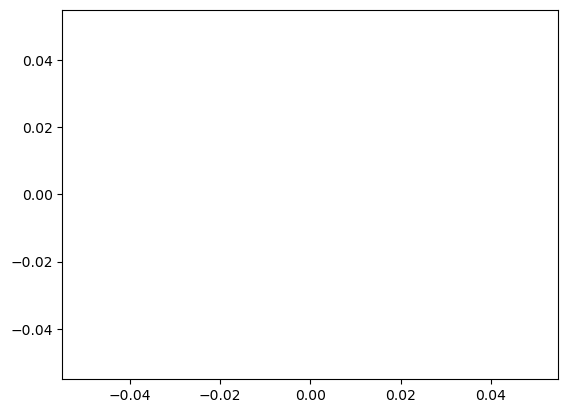

In [44]:
fig = plt.figure()
ax = fig.add_subplot()
phih_4_2=[]
Fuu_4_2=[]
Fuu_4_2_stat=[]
Fuu_4_2_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_4_2s = df_1xs_4_2[df_1xs_4_2['phih']>=i_phi_left][df_1xs_4_2['phih']<i_phi]['phih'].tolist()
    Fuu_4_2s = df_1xs_4_2[df_1xs_4_2['phih']>=i_phi_left][df_1xs_4_2['phih']<i_phi]['value'].tolist()
    Fuu_4_2_stats = df_1xs_4_2[df_1xs_4_2['phih']>=i_phi_left][df_1xs_4_2['phih']<i_phi]['stat'].tolist()
    print(len(phih_4_2s))
    
    if len(phih_4_2s)>0:  
        #print('phih',phih_4_2s)
        #print('Fuu',Fuu_4_2s)
        #print('Fuu_stat',Fuu_4_2_stats)
        _Fuu_4_2 = Get_weighted_average(Fuu_4_2s,Fuu_4_2_stats)[0]
        _Fuu_4_2_stat = Get_weighted_average(Fuu_4_2s,Fuu_4_2_stats)[1]
        _phih_4_2= Get_weighted_average_phi(phih_4_2s,Fuu_4_2_stats)[0]
        #print('_Fuu_4_2',_Fuu_4_2)
        #print('_phih',_phih_4_2)
        #print('_Fuu_stat',_Fuu_4_2_stat)
        Fuu_4_2.append(_Fuu_4_2)
        phih_4_2.append(_phih_4_2)
        Fuu_4_2_stat.append(_Fuu_4_2_stat)
        Fuu_4_2_sys.append(Sys_table[3][1]*_Fuu_4_2)
        #print(Fuu_4_2,phih_4_2)
        ax.plot([_phih_4_2,_phih_4_2],[_Fuu_4_2-_Fuu_4_2_stat,_Fuu_4_2+_Fuu_4_2_stat],color='blue',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_4_2,Fuu_4_2,'bo')

-3.141592653589793 -2.5132741228718345
0
-2.5132741228718345 -1.8849555921538759
0
-1.8849555921538759 -1.2566370614359172
0
-1.2566370614359172 -0.6283185307179586
0
-0.6283185307179586 0.6283185307179586
0
0.6283185307179586 1.2566370614359172
0
1.2566370614359172 1.8849555921538759
0
1.8849555921538759 2.5132741228718345
0
2.5132741228718345 3.141592653589793
0


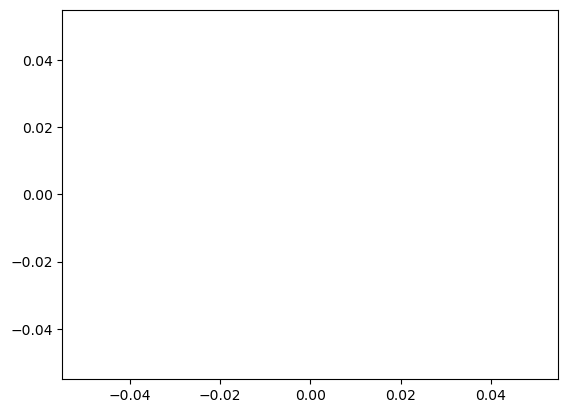

In [45]:
fig = plt.figure()
ax = fig.add_subplot()
phih_4_3=[]
Fuu_4_3=[]
Fuu_4_3_stat=[]
Fuu_4_3_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_4_3s = df_1xs_4_3[df_1xs_4_3['phih']>=i_phi_left][df_1xs_4_3['phih']<i_phi]['phih'].tolist()
    Fuu_4_3s = df_1xs_4_3[df_1xs_4_3['phih']>=i_phi_left][df_1xs_4_3['phih']<i_phi]['value'].tolist()
    Fuu_4_3_stats = df_1xs_4_3[df_1xs_4_3['phih']>=i_phi_left][df_1xs_4_3['phih']<i_phi]['stat'].tolist()
    print(len(phih_4_3s))
    
    if len(phih_4_3s)>0:  
        #print('phih',phih_4_3s)
        #print('Fuu',Fuu_4_3s)
        #print('Fuu_stat',Fuu_4_3_stats)
        _Fuu_4_3 = Get_weighted_average(Fuu_4_3s,Fuu_4_3_stats)[0]
        _Fuu_4_3_stat = Get_weighted_average(Fuu_4_3s,Fuu_4_3_stats)[1]
        _phih_4_3= Get_weighted_average_phi(phih_4_3s,Fuu_4_3_stats)[0]
        #print('_Fuu_4_3',_Fuu_4_3)
        #print('_phih',_phih_4_3)
        #print('_Fuu_stat',_Fuu_4_3_stat)
        Fuu_4_3.append(_Fuu_4_3)
        phih_4_3.append(_phih_4_3)
        Fuu_4_3_stat.append(_Fuu_4_3_stat)
        Fuu_4_3_sys.append(Sys_table[3][2]*_Fuu_4_3)
        #print(Fuu_4_3,phih_4_3)
        ax.plot([_phih_4_3,_phih_4_3],[_Fuu_4_3-_Fuu_4_3_stat,_Fuu_4_3+_Fuu_4_3_stat],color='blue',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_4_3,Fuu_4_3,'bo')

-3.141592653589793 -2.5132741228718345
41
-2.5132741228718345 -1.8849555921538759
47
-1.8849555921538759 -1.2566370614359172
59
-1.2566370614359172 -0.6283185307179586
45
-0.6283185307179586 0.6283185307179586
1
0.6283185307179586 1.2566370614359172
47
1.2566370614359172 1.8849555921538759
59
1.8849555921538759 2.5132741228718345
47
2.5132741228718345 3.141592653589793
40


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/3092226884.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_1_1s = df_3xs_1_1[df_3xs_1_1['phih']>=i_phi_left][df_3xs_1_1['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/3092226884.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_1_1s = df_3xs_1_1[df_3xs_1_1['phih']>=i_phi_left][df_3xs_1_1['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/3092226884.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_1_1_stats = df_3xs_1_1[df_3xs_1_1['phih']>=i_phi_left][df_3xs_1_1['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/3092226884.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_1_1s = df_3xs_1_1[df_3xs_1_1['phih']>=i_phi_left][df_3xs_

Text(0, 0.5, '$F_{UU}$')

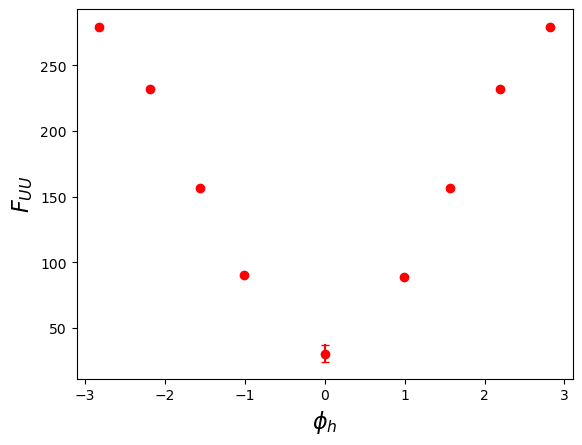

In [46]:
fig = plt.figure()
ax = fig.add_subplot()
phih_1_1_3xs=[]
Fuu_1_1_3xs=[]
Fuu_1_1_3xs_stat=[]
Fuu_1_1_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_1_1s = df_3xs_1_1[df_3xs_1_1['phih']>=i_phi_left][df_3xs_1_1['phih']<i_phi]['phih'].tolist()
    Fuu_1_1s = df_3xs_1_1[df_3xs_1_1['phih']>=i_phi_left][df_3xs_1_1['phih']<i_phi]['value'].tolist()
    Fuu_1_1_stats = df_3xs_1_1[df_3xs_1_1['phih']>=i_phi_left][df_3xs_1_1['phih']<i_phi]['stat'].tolist()
    print(len(phih_1_1s))
    
    if len(phih_1_1s)>0:  
        #print('phih',phih_1_1s)
        #print('Fuu',Fuu_1_1s)
        #print('Fuu_stat',Fuu_1_1_stats)
        _Fuu_1_1 = Get_weighted_average(Fuu_1_1s,Fuu_1_1_stats)[0]
        _Fuu_1_1_stat = Factor_3xs*Get_weighted_average(Fuu_1_1s,Fuu_1_1_stats)[1]
        _phih_1_1= Get_weighted_average_phi(phih_1_1s,Fuu_1_1_stats)[0]
        #print('_Fuu_1_1',_Fuu_1_1)
        #print('_phih',_phih_1_1)
        #print('_Fuu_stat',_Fuu_1_1_stat)
        Fuu_1_1_3xs.append(_Fuu_1_1)
        phih_1_1_3xs.append(_phih_1_1)
        Fuu_1_1_3xs_stat.append(_Fuu_1_1_stat)
        Fuu_1_1_3xs_sys.append(0.05*_Fuu_1_1)
        #print(Fuu_1_1,phih_1_1)
        ax.plot([_phih_1_1,_phih_1_1],[_Fuu_1_1-_Fuu_1_1_stat,_Fuu_1_1+_Fuu_1_1_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_1_1_3xs,Fuu_1_1_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.5132741228718345
37
-2.5132741228718345 -1.8849555921538759
40
-1.8849555921538759 -1.2566370614359172
42
-1.2566370614359172 -0.6283185307179586
30
-0.6283185307179586 0.6283185307179586
5
0.6283185307179586 1.2566370614359172
30
1.2566370614359172 1.8849555921538759
42
1.8849555921538759 2.5132741228718345
40
2.5132741228718345 3.141592653589793
37


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2648398505.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_1_2s = df_3xs_1_2[df_3xs_1_2['phih']>=i_phi_left][df_3xs_1_2['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2648398505.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_1_2s = df_3xs_1_2[df_3xs_1_2['phih']>=i_phi_left][df_3xs_1_2['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2648398505.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_1_2_stats = df_3xs_1_2[df_3xs_1_2['phih']>=i_phi_left][df_3xs_1_2['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2648398505.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_1_2s = df_3xs_1_2[df_3xs_1_2['phih']>=i_phi_left][df_3xs_

Text(0, 0.5, '$F_{UU}$')

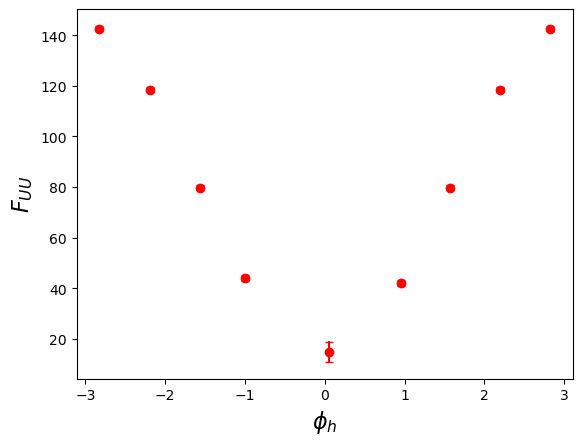

In [47]:
fig = plt.figure()
ax = fig.add_subplot()
phih_1_2_3xs=[]
Fuu_1_2_3xs=[]
Fuu_1_2_3xs_stat=[]
Fuu_1_2_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_1_2s = df_3xs_1_2[df_3xs_1_2['phih']>=i_phi_left][df_3xs_1_2['phih']<i_phi]['phih'].tolist()
    Fuu_1_2s = df_3xs_1_2[df_3xs_1_2['phih']>=i_phi_left][df_3xs_1_2['phih']<i_phi]['value'].tolist()
    Fuu_1_2_stats = df_3xs_1_2[df_3xs_1_2['phih']>=i_phi_left][df_3xs_1_2['phih']<i_phi]['stat'].tolist()
    print(len(phih_1_2s))
    
    if len(phih_1_2s)>0:  
        #print('phih',phih_1_2s)
        #print('Fuu',Fuu_1_2s)
        #print('Fuu_stat',Fuu_1_2_stats)
        _Fuu_1_2 = Get_weighted_average(Fuu_1_2s,Fuu_1_2_stats)[0]
        _Fuu_1_2_stat = Factor_3xs*Get_weighted_average(Fuu_1_2s,Fuu_1_2_stats)[1]
        _phih_1_2= Get_weighted_average_phi(phih_1_2s,Fuu_1_2_stats)[0]
        #print('_Fuu_1_2',_Fuu_1_2)
        #print('_phih',_phih_1_2)
        #print('_Fuu_stat',_Fuu_1_2_stat)
        Fuu_1_2_3xs.append(_Fuu_1_2)
        phih_1_2_3xs.append(_phih_1_2)
        Fuu_1_2_3xs_stat.append(_Fuu_1_2_stat)
        Fuu_1_2_3xs_sys.append(0.05*_Fuu_1_2)
        #print(Fuu_1_2,phih_1_2)
        ax.plot([_phih_1_2,_phih_1_2],[_Fuu_1_2-_Fuu_1_2_stat,_Fuu_1_2+_Fuu_1_2_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_1_2_3xs,Fuu_1_2_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.5132741228718345
17
-2.5132741228718345 -1.8849555921538759
18
-1.8849555921538759 -1.2566370614359172
18
-1.2566370614359172 -0.6283185307179586
13
-0.6283185307179586 0.6283185307179586
4
0.6283185307179586 1.2566370614359172
13
1.2566370614359172 1.8849555921538759
18
1.8849555921538759 2.5132741228718345
18
2.5132741228718345 3.141592653589793
17


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2872923745.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_1_3s = df_3xs_1_3[df_3xs_1_3['phih']>=i_phi_left][df_3xs_1_3['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2872923745.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_1_3s = df_3xs_1_3[df_3xs_1_3['phih']>=i_phi_left][df_3xs_1_3['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2872923745.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_1_3_stats = df_3xs_1_3[df_3xs_1_3['phih']>=i_phi_left][df_3xs_1_3['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/2872923745.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_1_3s = df_3xs_1_3[df_3xs_1_3['phih']>=i_phi_left][df_3xs_

Text(0, 0.5, '$F_{UU}$')

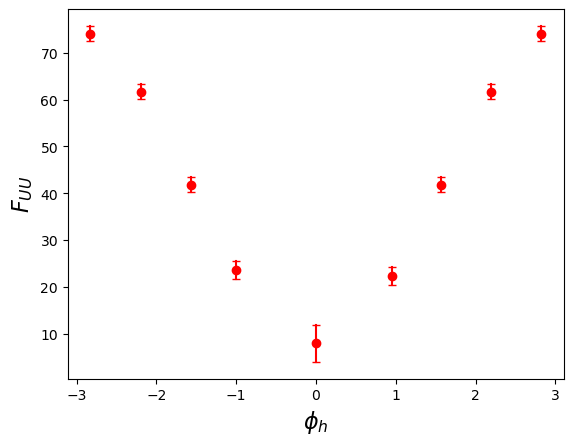

In [48]:
fig = plt.figure()
ax = fig.add_subplot()
phih_1_3_3xs=[]
Fuu_1_3_3xs=[]
Fuu_1_3_3xs_stat=[]
Fuu_1_3_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_1_3s = df_3xs_1_3[df_3xs_1_3['phih']>=i_phi_left][df_3xs_1_3['phih']<i_phi]['phih'].tolist()
    Fuu_1_3s = df_3xs_1_3[df_3xs_1_3['phih']>=i_phi_left][df_3xs_1_3['phih']<i_phi]['value'].tolist()
    Fuu_1_3_stats = df_3xs_1_3[df_3xs_1_3['phih']>=i_phi_left][df_3xs_1_3['phih']<i_phi]['stat'].tolist()
    print(len(phih_1_3s))
    
    if len(phih_1_3s)>0:  
        #print('phih',phih_1_3s)
        #print('Fuu',Fuu_1_3s)
        #print('Fuu_stat',Fuu_1_3_stats)
        _Fuu_1_3 = Get_weighted_average(Fuu_1_3s,Fuu_1_3_stats)[0]
        _Fuu_1_3_stat = Factor_3xs*Get_weighted_average(Fuu_1_3s,Fuu_1_3_stats)[1]
        _phih_1_3= Get_weighted_average_phi(phih_1_3s,Fuu_1_3_stats)[0]
        #print('_Fuu_1_3',_Fuu_1_3)
        #print('_phih',_phih_1_3)
        #print('_Fuu_stat',_Fuu_1_3_stat)
        Fuu_1_3_3xs.append(_Fuu_1_3)
        phih_1_3_3xs.append(_phih_1_3)
        Fuu_1_3_3xs_stat.append(_Fuu_1_3_stat)
        Fuu_1_3_3xs_sys.append(0.05*_Fuu_1_3)
        #print(Fuu_1_3,phih_1_3)
        ax.plot([_phih_1_3,_phih_1_3],[_Fuu_1_3-_Fuu_1_3_stat,_Fuu_1_3+_Fuu_1_3_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_1_3_3xs,Fuu_1_3_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.5132741228718345
28
-2.5132741228718345 -1.8849555921538759
37
-1.8849555921538759 -1.2566370614359172
52
-1.2566370614359172 -0.6283185307179586
29
-0.6283185307179586 0.6283185307179586
0
0.6283185307179586 1.2566370614359172
29
1.2566370614359172 1.8849555921538759
53
1.8849555921538759 2.5132741228718345
37
2.5132741228718345 3.141592653589793
28


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/295057374.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_2_1s = df_3xs_2_1[df_3xs_2_1['phih']>=i_phi_left][df_3xs_2_1['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/295057374.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_2_1s = df_3xs_2_1[df_3xs_2_1['phih']>=i_phi_left][df_3xs_2_1['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/295057374.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_2_1_stats = df_3xs_2_1[df_3xs_2_1['phih']>=i_phi_left][df_3xs_2_1['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/295057374.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_2_1s = df_3xs_2_1[df_3xs_2_1['phih']>=i_phi_left][df_3xs_2_1[

Text(0, 0.5, '$F_{UU}$')

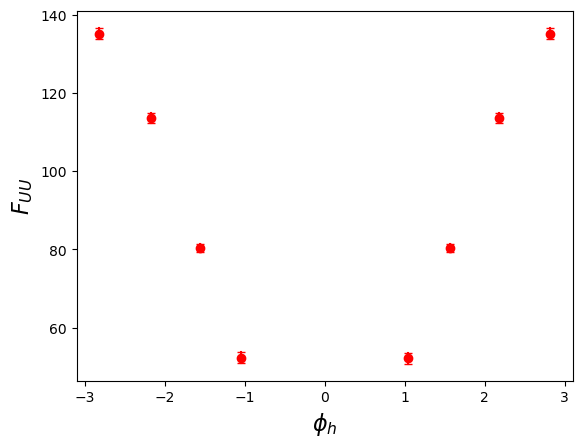

In [49]:
fig = plt.figure()
ax = fig.add_subplot()
phih_2_1_3xs=[]
Fuu_2_1_3xs=[]
Fuu_2_1_3xs_stat=[]
Fuu_2_1_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_2_1s = df_3xs_2_1[df_3xs_2_1['phih']>=i_phi_left][df_3xs_2_1['phih']<i_phi]['phih'].tolist()
    Fuu_2_1s = df_3xs_2_1[df_3xs_2_1['phih']>=i_phi_left][df_3xs_2_1['phih']<i_phi]['value'].tolist()
    Fuu_2_1_stats = df_3xs_2_1[df_3xs_2_1['phih']>=i_phi_left][df_3xs_2_1['phih']<i_phi]['stat'].tolist()
    print(len(phih_2_1s))
    
    if len(phih_2_1s)>0:  
        #print('phih',phih_2_1s)
        #print('Fuu',Fuu_2_1s)
        #print('Fuu_stat',Fuu_2_1_stats)
        _Fuu_2_1 = Get_weighted_average(Fuu_2_1s,Fuu_2_1_stats)[0]
        _Fuu_2_1_stat = Factor_3xs*Get_weighted_average(Fuu_2_1s,Fuu_2_1_stats)[1]
        _phih_2_1= Get_weighted_average_phi(phih_2_1s,Fuu_2_1_stats)[0]
        #print('_Fuu_2_1',_Fuu_2_1)
        #print('_phih',_phih_2_1)
        #print('_Fuu_stat',_Fuu_2_1_stat)
        Fuu_2_1_3xs.append(_Fuu_2_1)
        phih_2_1_3xs.append(_phih_2_1)
        Fuu_2_1_3xs_stat.append(_Fuu_2_1_stat)
        Fuu_2_1_3xs_sys.append(0.05*_Fuu_2_1)
        #print(Fuu_2_1,phih_2_1)
        ax.plot([_phih_2_1,_phih_2_1],[_Fuu_2_1-_Fuu_2_1_stat,_Fuu_2_1+_Fuu_2_1_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_2_1_3xs,Fuu_2_1_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.5132741228718345
28
-2.5132741228718345 -1.8849555921538759
34
-1.8849555921538759 -1.2566370614359172
34
-1.2566370614359172 -0.6283185307179586
15
-0.6283185307179586 0.6283185307179586
6
0.6283185307179586 1.2566370614359172
14
1.2566370614359172 1.8849555921538759
35
1.8849555921538759 2.5132741228718345
34
2.5132741228718345 3.141592653589793
28


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/1806478085.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_2_2s = df_3xs_2_2[df_3xs_2_2['phih']>=i_phi_left][df_3xs_2_2['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/1806478085.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_2_2s = df_3xs_2_2[df_3xs_2_2['phih']>=i_phi_left][df_3xs_2_2['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/1806478085.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_2_2_stats = df_3xs_2_2[df_3xs_2_2['phih']>=i_phi_left][df_3xs_2_2['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/1806478085.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_2_2s = df_3xs_2_2[df_3xs_2_2['phih']>=i_phi_left][df_3xs_

Text(0, 0.5, '$F_{UU}$')

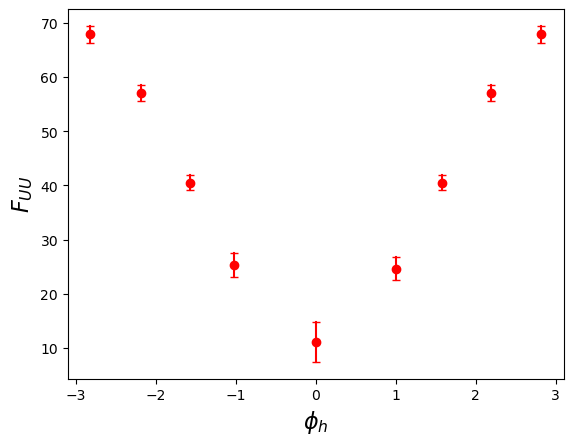

In [50]:
fig = plt.figure()
ax = fig.add_subplot()
phih_2_2_3xs=[]
Fuu_2_2_3xs=[]
Fuu_2_2_3xs_stat=[]
Fuu_2_2_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_2_2s = df_3xs_2_2[df_3xs_2_2['phih']>=i_phi_left][df_3xs_2_2['phih']<i_phi]['phih'].tolist()
    Fuu_2_2s = df_3xs_2_2[df_3xs_2_2['phih']>=i_phi_left][df_3xs_2_2['phih']<i_phi]['value'].tolist()
    Fuu_2_2_stats = df_3xs_2_2[df_3xs_2_2['phih']>=i_phi_left][df_3xs_2_2['phih']<i_phi]['stat'].tolist()
    print(len(phih_2_2s))
    
    if len(phih_2_2s)>0:  
        #print('phih',phih_2_2s)
        #print('Fuu',Fuu_2_2s)
        #print('Fuu_stat',Fuu_2_2_stats)
        _Fuu_2_2 = Get_weighted_average(Fuu_2_2s,Fuu_2_2_stats)[0]
        _Fuu_2_2_stat = Factor_3xs*Get_weighted_average(Fuu_2_2s,Fuu_2_2_stats)[1]
        _phih_2_2= Get_weighted_average_phi(phih_2_2s,Fuu_2_2_stats)[0]
        #print('_Fuu_2_2',_Fuu_2_2)
        #print('_phih',_phih_2_2)
        #print('_Fuu_stat',_Fuu_2_2_stat)
        Fuu_2_2_3xs.append(_Fuu_2_2)
        phih_2_2_3xs.append(_phih_2_2)
        Fuu_2_2_3xs_stat.append(_Fuu_2_2_stat)
        Fuu_2_2_3xs_sys.append(0.05*_Fuu_2_2)
        #print(Fuu_2_2,phih_2_2)
        ax.plot([_phih_2_2,_phih_2_2],[_Fuu_2_2-_Fuu_2_2_stat,_Fuu_2_2+_Fuu_2_2_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_2_2_3xs,Fuu_2_2_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.5132741228718345
13
-2.5132741228718345 -1.8849555921538759
14
-1.8849555921538759 -1.2566370614359172
15
-1.2566370614359172 -0.6283185307179586
8
-0.6283185307179586 0.6283185307179586
1
0.6283185307179586 1.2566370614359172
7
1.2566370614359172 1.8849555921538759
15
1.8849555921538759 2.5132741228718345
14
2.5132741228718345 3.141592653589793
13


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/4103060561.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_2_3s = df_3xs_2_3[df_3xs_2_3['phih']>=i_phi_left][df_3xs_2_3['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/4103060561.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_2_3s = df_3xs_2_3[df_3xs_2_3['phih']>=i_phi_left][df_3xs_2_3['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/4103060561.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_2_3_stats = df_3xs_2_3[df_3xs_2_3['phih']>=i_phi_left][df_3xs_2_3['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/4103060561.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_2_3s = df_3xs_2_3[df_3xs_2_3['phih']>=i_phi_left][df_3xs_

Text(0, 0.5, '$F_{UU}$')

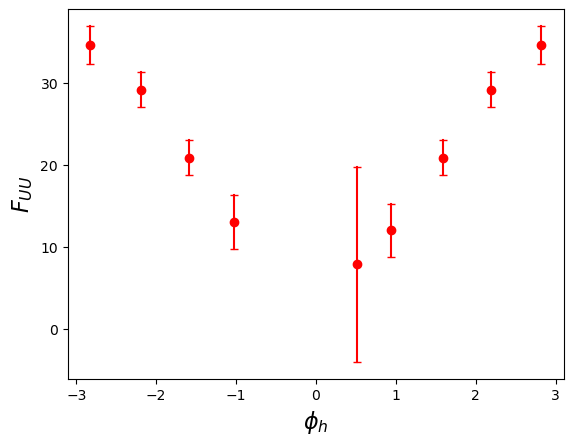

In [51]:
fig = plt.figure()
ax = fig.add_subplot()
phih_2_3_3xs=[]
Fuu_2_3_3xs=[]
Fuu_2_3_3xs_stat=[]
Fuu_2_3_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_2_3s = df_3xs_2_3[df_3xs_2_3['phih']>=i_phi_left][df_3xs_2_3['phih']<i_phi]['phih'].tolist()
    Fuu_2_3s = df_3xs_2_3[df_3xs_2_3['phih']>=i_phi_left][df_3xs_2_3['phih']<i_phi]['value'].tolist()
    Fuu_2_3_stats = df_3xs_2_3[df_3xs_2_3['phih']>=i_phi_left][df_3xs_2_3['phih']<i_phi]['stat'].tolist()
    print(len(phih_2_3s))
    
    if len(phih_2_3s)>0:  
        #print('phih',phih_2_3s)
        #print('Fuu',Fuu_2_3s)
        #print('Fuu_stat',Fuu_2_3_stats)
        _Fuu_2_3 = Get_weighted_average(Fuu_2_3s,Fuu_2_3_stats)[0]
        _Fuu_2_3_stat = Factor_3xs*Get_weighted_average(Fuu_2_3s,Fuu_2_3_stats)[1]
        _phih_2_3= Get_weighted_average_phi(phih_2_3s,Fuu_2_3_stats)[0]
        #print('_Fuu_2_3',_Fuu_2_3)
        #print('_phih',_phih_2_3)
        #print('_Fuu_stat',_Fuu_2_3_stat)
        Fuu_2_3_3xs.append(_Fuu_2_3)
        phih_2_3_3xs.append(_phih_2_3)
        Fuu_2_3_3xs_stat.append(_Fuu_2_3_stat)
        Fuu_2_3_3xs_sys.append(0.05*_Fuu_2_3)
        #print(Fuu_2_3,phih_2_3)
        ax.plot([_phih_2_3,_phih_2_3],[_Fuu_2_3-_Fuu_2_3_stat,_Fuu_2_3+_Fuu_2_3_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_2_3_3xs,Fuu_2_3_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.5132741228718345
9
-2.5132741228718345 -1.8849555921538759
15
-1.8849555921538759 -1.2566370614359172
21
-1.2566370614359172 -0.6283185307179586
9
-0.6283185307179586 0.6283185307179586
0
0.6283185307179586 1.2566370614359172
9
1.2566370614359172 1.8849555921538759
21
1.8849555921538759 2.5132741228718345
15
2.5132741228718345 3.141592653589793
10


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/3716539223.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_3_1s = df_3xs_3_1[df_3xs_3_1['phih']>=i_phi_left][df_3xs_3_1['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/3716539223.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_3_1s = df_3xs_3_1[df_3xs_3_1['phih']>=i_phi_left][df_3xs_3_1['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/3716539223.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_3_1_stats = df_3xs_3_1[df_3xs_3_1['phih']>=i_phi_left][df_3xs_3_1['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/3716539223.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_3_1s = df_3xs_3_1[df_3xs_3_1['phih']>=i_phi_left][df_3xs_

Text(0, 0.5, '$F_{UU}$')

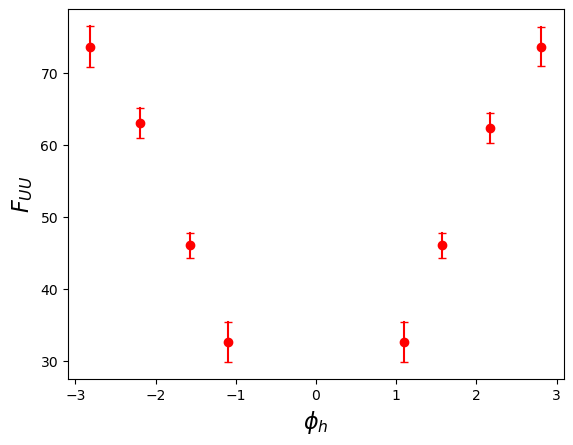

In [52]:
fig = plt.figure()
ax = fig.add_subplot()
phih_3_1_3xs=[]
Fuu_3_1_3xs=[]
Fuu_3_1_3xs_stat=[]
Fuu_3_1_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_3_1s = df_3xs_3_1[df_3xs_3_1['phih']>=i_phi_left][df_3xs_3_1['phih']<i_phi]['phih'].tolist()
    Fuu_3_1s = df_3xs_3_1[df_3xs_3_1['phih']>=i_phi_left][df_3xs_3_1['phih']<i_phi]['value'].tolist()
    Fuu_3_1_stats = df_3xs_3_1[df_3xs_3_1['phih']>=i_phi_left][df_3xs_3_1['phih']<i_phi]['stat'].tolist()
    print(len(phih_3_1s))
    
    if len(phih_3_1s)>0:  
        #print('phih',phih_3_1s)
        #print('Fuu',Fuu_3_1s)
        #print('Fuu_stat',Fuu_3_1_stats)
        _Fuu_3_1 = Get_weighted_average(Fuu_3_1s,Fuu_3_1_stats)[0]
        _Fuu_3_1_stat = Factor_3xs*Get_weighted_average(Fuu_3_1s,Fuu_3_1_stats)[1]
        _phih_3_1= Get_weighted_average_phi(phih_3_1s,Fuu_3_1_stats)[0]
        #print('_Fuu_3_1',_Fuu_3_1)
        #print('_phih',_phih_3_1)
        #print('_Fuu_stat',_Fuu_3_1_stat)
        Fuu_3_1_3xs.append(_Fuu_3_1)
        phih_3_1_3xs.append(_phih_3_1)
        Fuu_3_1_3xs_stat.append(_Fuu_3_1_stat)
        Fuu_3_1_3xs_sys.append(0.05*_Fuu_3_1)
        #print(Fuu_3_1,phih_3_1)
        ax.plot([_phih_3_1,_phih_3_1],[_Fuu_3_1-_Fuu_3_1_stat,_Fuu_3_1+_Fuu_3_1_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_3_1_3xs,Fuu_3_1_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.5132741228718345
11
-2.5132741228718345 -1.8849555921538759
16
-1.8849555921538759 -1.2566370614359172
11
-1.2566370614359172 -0.6283185307179586
2
-0.6283185307179586 0.6283185307179586
8
0.6283185307179586 1.2566370614359172
4
1.2566370614359172 1.8849555921538759
12
1.8849555921538759 2.5132741228718345
14
2.5132741228718345 3.141592653589793
12


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/3194809815.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_3_2s = df_3xs_3_2[df_3xs_3_2['phih']>=i_phi_left][df_3xs_3_2['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/3194809815.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_3_2s = df_3xs_3_2[df_3xs_3_2['phih']>=i_phi_left][df_3xs_3_2['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/3194809815.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_3_2_stats = df_3xs_3_2[df_3xs_3_2['phih']>=i_phi_left][df_3xs_3_2['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/3194809815.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_3_2s = df_3xs_3_2[df_3xs_3_2['phih']>=i_phi_left][df_3xs_

Text(0, 0.5, '$F_{UU}$')

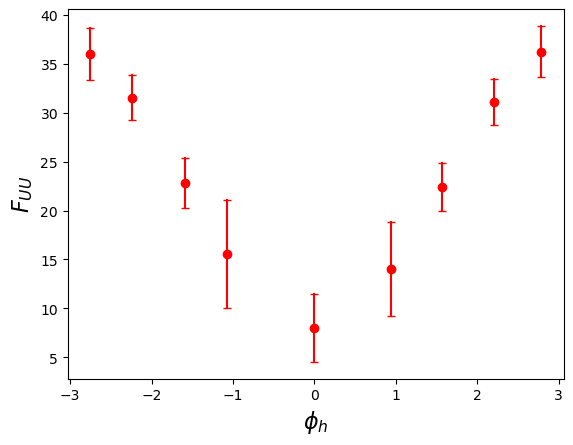

In [53]:
fig = plt.figure()
ax = fig.add_subplot()
phih_3_2_3xs=[]
Fuu_3_2_3xs=[]
Fuu_3_2_3xs_stat=[]
Fuu_3_2_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_3_2s = df_3xs_3_2[df_3xs_3_2['phih']>=i_phi_left][df_3xs_3_2['phih']<i_phi]['phih'].tolist()
    Fuu_3_2s = df_3xs_3_2[df_3xs_3_2['phih']>=i_phi_left][df_3xs_3_2['phih']<i_phi]['value'].tolist()
    Fuu_3_2_stats = df_3xs_3_2[df_3xs_3_2['phih']>=i_phi_left][df_3xs_3_2['phih']<i_phi]['stat'].tolist()
    print(len(phih_3_2s))
    
    if len(phih_3_2s)>0:  
        #print('phih',phih_3_2s)
        #print('Fuu',Fuu_3_2s)
        #print('Fuu_stat',Fuu_3_2_stats)
        _Fuu_3_2 = Get_weighted_average(Fuu_3_2s,Fuu_3_2_stats)[0]
        _Fuu_3_2_stat = Factor_3xs*Get_weighted_average(Fuu_3_2s,Fuu_3_2_stats)[1]
        _phih_3_2= Get_weighted_average_phi(phih_3_2s,Fuu_3_2_stats)[0]
        #print('_Fuu_3_2',_Fuu_3_2)
        #print('_phih',_phih_3_2)
        #print('_Fuu_stat',_Fuu_3_2_stat)
        Fuu_3_2_3xs.append(_Fuu_3_2)
        phih_3_2_3xs.append(_phih_3_2)
        Fuu_3_2_3xs_stat.append(_Fuu_3_2_stat)
        Fuu_3_2_3xs_sys.append(0.05*_Fuu_3_2)
        #print(Fuu_3_2,phih_3_2)
        ax.plot([_phih_3_2,_phih_3_2],[_Fuu_3_2-_Fuu_3_2_stat,_Fuu_3_2+_Fuu_3_2_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_3_2_3xs,Fuu_3_2_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.5132741228718345
6
-2.5132741228718345 -1.8849555921538759
6
-1.8849555921538759 -1.2566370614359172
6
-1.2566370614359172 -0.6283185307179586
0
-0.6283185307179586 0.6283185307179586
0
0.6283185307179586 1.2566370614359172
7
1.2566370614359172 1.8849555921538759
1
1.8849555921538759 2.5132741228718345
7
2.5132741228718345 3.141592653589793
6


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/805822727.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_3_3s = df_3xs_3_3[df_3xs_3_3['phih']>=i_phi_left][df_3xs_3_3['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/805822727.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_3_3s = df_3xs_3_3[df_3xs_3_3['phih']>=i_phi_left][df_3xs_3_3['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/805822727.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_3_3_stats = df_3xs_3_3[df_3xs_3_3['phih']>=i_phi_left][df_3xs_3_3['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_5489/805822727.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_3_3s = df_3xs_3_3[df_3xs_3_3['phih']>=i_phi_left][df_3xs_3_3[

Text(0, 0.5, '$F_{UU}$')

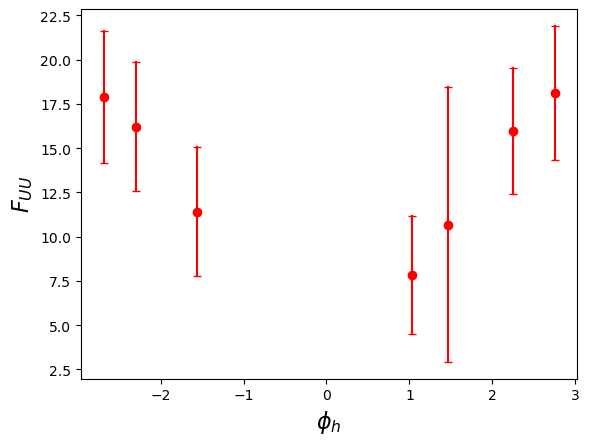

In [54]:
fig = plt.figure()
ax = fig.add_subplot()
phih_3_3_3xs=[]
Fuu_3_3_3xs=[]
Fuu_3_3_3xs_stat=[]
Fuu_3_3_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_3_3s = df_3xs_3_3[df_3xs_3_3['phih']>=i_phi_left][df_3xs_3_3['phih']<i_phi]['phih'].tolist()
    Fuu_3_3s = df_3xs_3_3[df_3xs_3_3['phih']>=i_phi_left][df_3xs_3_3['phih']<i_phi]['value'].tolist()
    Fuu_3_3_stats = df_3xs_3_3[df_3xs_3_3['phih']>=i_phi_left][df_3xs_3_3['phih']<i_phi]['stat'].tolist()
    print(len(phih_3_3s))
    
    if len(phih_3_3s)>0:  
        #print('phih',phih_3_3s)
        #print('Fuu',Fuu_3_3s)
        #print('Fuu_stat',Fuu_3_3_stats)
        _Fuu_3_3 = Get_weighted_average(Fuu_3_3s,Fuu_3_3_stats)[0]
        _Fuu_3_3_stat = Factor_3xs*Get_weighted_average(Fuu_3_3s,Fuu_3_3_stats)[1]
        _phih_3_3= Get_weighted_average_phi(phih_3_3s,Fuu_3_3_stats)[0]
        #print('_Fuu_3_3',_Fuu_3_3)
        #print('_phih',_phih_3_3)
        #print('_Fuu_stat',_Fuu_3_3_stat)
        Fuu_3_3_3xs.append(_Fuu_3_3)
        phih_3_3_3xs.append(_phih_3_3)
        Fuu_3_3_3xs_stat.append(_Fuu_3_3_stat)
        Fuu_3_3_3xs_sys.append(0.05*_Fuu_3_3)
        #print(Fuu_3_3,phih_3_3)
        ax.plot([_phih_3_3,_phih_3_3],[_Fuu_3_3-_Fuu_3_3_stat,_Fuu_3_3+_Fuu_3_3_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_3_3_3xs,Fuu_3_3_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.5132741228718345
0
-2.5132741228718345 -1.8849555921538759
0
-1.8849555921538759 -1.2566370614359172
0
-1.2566370614359172 -0.6283185307179586
0
-0.6283185307179586 0.6283185307179586
0
0.6283185307179586 1.2566370614359172
0
1.2566370614359172 1.8849555921538759
0
1.8849555921538759 2.5132741228718345
0
2.5132741228718345 3.141592653589793
0


Text(0, 0.5, '$F_{UU}$')

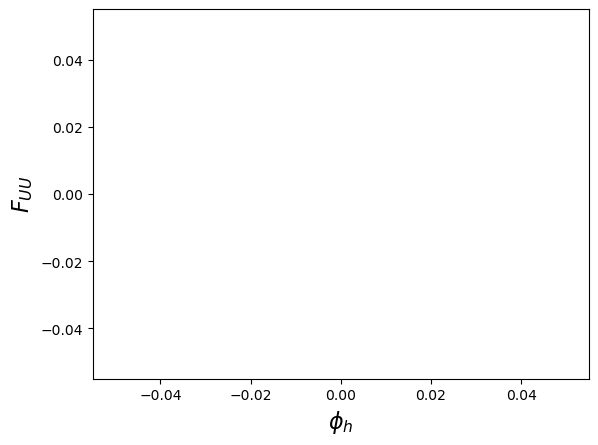

In [55]:
fig = plt.figure()
ax = fig.add_subplot()
phih_4_1_3xs=[]
Fuu_4_1_3xs=[]
Fuu_4_1_3xs_stat=[]
Fuu_4_1_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_4_1s = df_3xs_4_1[df_3xs_4_1['phih']>=i_phi_left][df_3xs_4_1['phih']<i_phi]['phih'].tolist()
    Fuu_4_1s = df_3xs_4_1[df_3xs_4_1['phih']>=i_phi_left][df_3xs_4_1['phih']<i_phi]['value'].tolist()
    Fuu_4_1_stats = df_3xs_4_1[df_3xs_4_1['phih']>=i_phi_left][df_3xs_4_1['phih']<i_phi]['stat'].tolist()
    print(len(phih_4_1s))
    
    if len(phih_4_1s)>0:  
        #print('phih',phih_4_1s)
        #print('Fuu',Fuu_4_1s)
        #print('Fuu_stat',Fuu_4_1_stats)
        _Fuu_4_1 = Get_weighted_average(Fuu_4_1s,Fuu_4_1_stats)[0]
        _Fuu_4_1_stat = Factor_3xs*Get_weighted_average(Fuu_4_1s,Fuu_4_1_stats)[1]
        _phih_4_1= Get_weighted_average_phi(phih_4_1s,Fuu_4_1_stats)[0]
        #print('_Fuu_4_1',_Fuu_4_1)
        #print('_phih',_phih_4_1)
        #print('_Fuu_stat',_Fuu_4_1_stat)
        Fuu_4_1_3xs.append(_Fuu_4_1)
        phih_4_1_3xs.append(_phih_4_1)
        Fuu_4_1_3xs_stat.append(_Fuu_4_1_stat)
        Fuu_4_1_3xs_sys.append(0.05*_Fuu_4_1)
        #print(Fuu_4_1,phih_4_1)
        ax.plot([_phih_4_1,_phih_4_1],[_Fuu_4_1-_Fuu_4_1_stat,_Fuu_4_1+_Fuu_4_1_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_4_1_3xs,Fuu_4_1_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.5132741228718345
0
-2.5132741228718345 -1.8849555921538759
0
-1.8849555921538759 -1.2566370614359172
0
-1.2566370614359172 -0.6283185307179586
0
-0.6283185307179586 0.6283185307179586
0
0.6283185307179586 1.2566370614359172
0
1.2566370614359172 1.8849555921538759
0
1.8849555921538759 2.5132741228718345
0
2.5132741228718345 3.141592653589793
0


Text(0, 0.5, '$F_{UU}$')

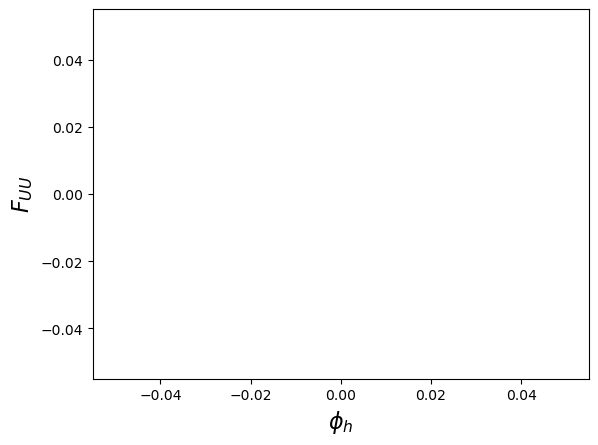

In [56]:
fig = plt.figure()
ax = fig.add_subplot()
phih_4_2_3xs=[]
Fuu_4_2_3xs=[]
Fuu_4_2_3xs_stat=[]
Fuu_4_2_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_4_2s = df_3xs_4_2[df_3xs_4_2['phih']>=i_phi_left][df_3xs_4_2['phih']<i_phi]['phih'].tolist()
    Fuu_4_2s = df_3xs_4_2[df_3xs_4_2['phih']>=i_phi_left][df_3xs_4_2['phih']<i_phi]['value'].tolist()
    Fuu_4_2_stats = df_3xs_4_2[df_3xs_4_2['phih']>=i_phi_left][df_3xs_4_2['phih']<i_phi]['stat'].tolist()
    print(len(phih_4_2s))
    
    if len(phih_4_2s)>0:  
        #print('phih',phih_4_2s)
        #print('Fuu',Fuu_4_2s)
        #print('Fuu_stat',Fuu_4_2_stats)
        _Fuu_4_2 = Get_weighted_average(Fuu_4_2s,Fuu_4_2_stats)[0]
        _Fuu_4_2_stat = Factor_3xs*Get_weighted_average(Fuu_4_2s,Fuu_4_2_stats)[1]
        _phih_4_2= Get_weighted_average_phi(phih_4_2s,Fuu_4_2_stats)[0]
        #print('_Fuu_4_2',_Fuu_4_2)
        #print('_phih',_phih_4_2)
        #print('_Fuu_stat',_Fuu_4_2_stat)
        Fuu_4_2_3xs.append(_Fuu_4_2)
        phih_4_2_3xs.append(_phih_4_2)
        Fuu_4_2_3xs_stat.append(_Fuu_4_2_stat)
        Fuu_4_2_3xs_sys.append(0.05*_Fuu_4_2)
        #print(Fuu_4_2,phih_4_2)
        ax.plot([_phih_4_2,_phih_4_2],[_Fuu_4_2-_Fuu_4_2_stat,_Fuu_4_2+_Fuu_4_2_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_4_2_3xs,Fuu_4_2_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.5132741228718345
0
-2.5132741228718345 -1.8849555921538759
0
-1.8849555921538759 -1.2566370614359172
0
-1.2566370614359172 -0.6283185307179586
0
-0.6283185307179586 0.6283185307179586
0
0.6283185307179586 1.2566370614359172
0
1.2566370614359172 1.8849555921538759
0
1.8849555921538759 2.5132741228718345
0
2.5132741228718345 3.141592653589793
0


Text(0, 0.5, '$F_{UU}$')

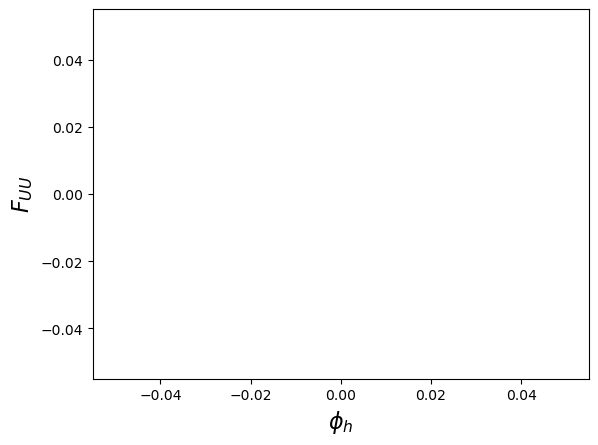

In [57]:
fig = plt.figure()
ax = fig.add_subplot()
phih_4_3_3xs=[]
Fuu_4_3_3xs=[]
Fuu_4_3_3xs_stat=[]
Fuu_4_3_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_4_3s = df_3xs_4_3[df_3xs_4_3['phih']>=i_phi_left][df_3xs_4_3['phih']<i_phi]['phih'].tolist()
    Fuu_4_3s = df_3xs_4_3[df_3xs_4_3['phih']>=i_phi_left][df_3xs_4_3['phih']<i_phi]['value'].tolist()
    Fuu_4_3_stats = df_3xs_4_3[df_3xs_4_3['phih']>=i_phi_left][df_3xs_4_3['phih']<i_phi]['stat'].tolist()
    print(len(phih_4_3s))
    
    if len(phih_4_3s)>0:  
        #print('phih',phih_4_3s)
        #print('Fuu',Fuu_4_3s)
        #print('Fuu_stat',Fuu_4_3_stats)
        _Fuu_4_3 = Get_weighted_average(Fuu_4_3s,Fuu_4_3_stats)[0]
        _Fuu_4_3_stat = Factor_3xs*Get_weighted_average(Fuu_4_3s,Fuu_4_3_stats)[1]
        _phih_4_3= Get_weighted_average_phi(phih_4_3s,Fuu_4_3_stats)[0]
        #print('_Fuu_4_3',_Fuu_4_3)
        #print('_phih',_phih_4_3)
        #print('_Fuu_stat',_Fuu_4_3_stat)
        Fuu_4_3_3xs.append(_Fuu_4_3)
        phih_4_3_3xs.append(_phih_4_3)
        Fuu_4_3_3xs_stat.append(_Fuu_4_3_stat)
        Fuu_4_3_3xs_sys.append(0.05*_Fuu_4_3)
        #print(Fuu_4_3,phih_4_3)
        ax.plot([_phih_4_3,_phih_4_3],[_Fuu_4_3-_Fuu_4_3_stat,_Fuu_4_3+_Fuu_4_3_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_4_3_3xs,Fuu_4_3_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

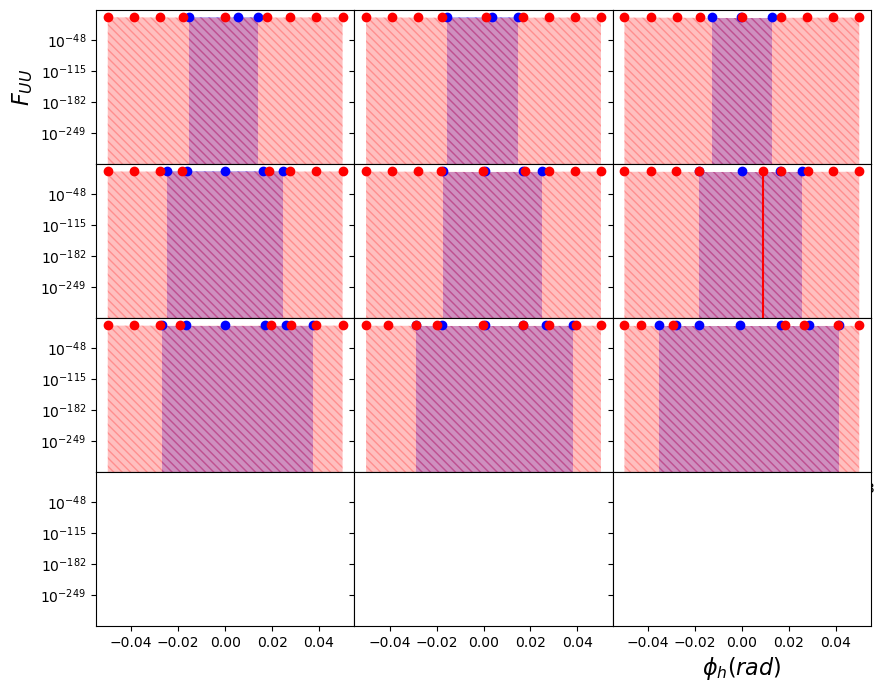

In [58]:
fig, axs = plt.subplots(4,3,figsize=(10,8),sharey=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
#plt.ylim(0.0002,0.99)
plt.yscale('log')
plt.xlabel('$\phi_h(rad)$',fontsize=16)

for i_1_1 in range(0,len(phih_1_1)):
    _phih_1_1 = phih_1_1[i_1_1]
    _Fuu_1_1 = Fuu_1_1[i_1_1]
    _Fuu_1_1_stat = Fuu_1_1_stat[i_1_1]
    axs[0][0].plot([_phih_1_1,_phih_1_1],[_Fuu_1_1-_Fuu_1_1_stat,_Fuu_1_1+_Fuu_1_1_stat],color='blue',marker='_')
axs[0][0].plot(phih_1_1,Fuu_1_1,'bo')
axs[0][0].fill_between(phih_1_1,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_1_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[0][0].set_ylabel('$F_{UU}$',fontsize=16)
for i_1_1_3xs in range(0,len(phih_1_1_3xs)):
    _phih_1_1 = phih_1_1_3xs[i_1_1_3xs]
    _Fuu_1_1 = Fuu_1_1_3xs[i_1_1_3xs]
    _Fuu_1_1_stat = Fuu_1_1_3xs_stat[i_1_1_3xs]
    axs[0][0].plot([_phih_1_1,_phih_1_1],[_Fuu_1_1-_Fuu_1_1_stat,_Fuu_1_1+_Fuu_1_1_stat],color='red',marker='_')
axs[0][0].plot(phih_1_1_3xs,Fuu_1_1_3xs,'ro')
axs[0][0].fill_between(phih_1_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_1_2 in range(0,len(phih_1_2)):
    _phih_1_2 = phih_1_2[i_1_2]
    _Fuu_1_2 = Fuu_1_2[i_1_2]
    _Fuu_1_2_stat = Fuu_1_2_stat[i_1_2]
    axs[0][1].plot([_phih_1_2,_phih_1_2],[_Fuu_1_2-_Fuu_1_2_stat,_Fuu_1_2+_Fuu_1_2_stat],color='blue',marker='_')
axs[0][1].plot(phih_1_2,Fuu_1_2,'bo')
axs[0][1].fill_between(phih_1_2,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_2_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_1_2_3xs in range(0,len(phih_1_2_3xs)):
    _phih_1_2 = phih_1_2_3xs[i_1_2_3xs]
    _Fuu_1_2 = Fuu_1_2_3xs[i_1_2_3xs]
    _Fuu_1_2_stat = Fuu_1_2_3xs_stat[i_1_2_3xs]
    axs[0][1].plot([_phih_1_2,_phih_1_2],[_Fuu_1_2-_Fuu_1_2_stat,_Fuu_1_2+_Fuu_1_2_stat],color='red',marker='_')
axs[0][1].plot(phih_1_2_3xs,Fuu_1_2_3xs,'ro')
axs[0][1].fill_between(phih_1_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_1_3 in range(0,len(phih_1_3)):
    _phih_1_3 = phih_1_3[i_1_3]
    _Fuu_1_3 = Fuu_1_3[i_1_3]
    _Fuu_1_3_stat = Fuu_1_3_stat[i_1_3]
    axs[0][2].plot([_phih_1_3,_phih_1_3],[_Fuu_1_3-_Fuu_1_3_stat,_Fuu_1_3+_Fuu_1_3_stat],color='blue',marker='_')
axs[0][2].plot(phih_1_3,Fuu_1_3,'bo')
axs[0][2].fill_between(phih_1_3,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_3_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_1_3_3xs in range(0,len(phih_1_3_3xs)):
    _phih_1_3 = phih_1_3_3xs[i_1_3_3xs]
    _Fuu_1_3 = Fuu_1_3_3xs[i_1_3_3xs]
    _Fuu_1_3_stat = Fuu_1_3_3xs_stat[i_1_3_3xs]
    axs[0][2].plot([_phih_1_3,_phih_1_3],[_Fuu_1_3-_Fuu_1_3_stat,_Fuu_1_3+_Fuu_1_3_stat],color='red',marker='_')
axs[0][2].plot(phih_1_3_3xs,Fuu_1_3_3xs,'ro')
axs[0][2].fill_between(phih_1_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_2_1 in range(0,len(phih_2_1)):
    _phih_2_1 = phih_2_1[i_2_1]
    _Fuu_2_1 = Fuu_2_1[i_2_1]
    _Fuu_2_1_stat = Fuu_2_1_stat[i_2_1]
    axs[1][0].plot([_phih_2_1,_phih_2_1],[_Fuu_2_1-_Fuu_2_1_stat,_Fuu_2_1+_Fuu_2_1_stat],color='blue',marker='_')
axs[1][0].plot(phih_2_1,Fuu_2_1,'bo')
axs[1][0].fill_between(phih_2_1,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_1_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_2_1_3xs in range(0,len(phih_2_1_3xs)):
    _phih_2_1 = phih_2_1_3xs[i_2_1_3xs]
    _Fuu_2_1 = Fuu_2_1_3xs[i_2_1_3xs]
    _Fuu_2_1_stat = Fuu_2_1_3xs_stat[i_2_1_3xs]
    axs[1][0].plot([_phih_2_1,_phih_2_1],[_Fuu_2_1-_Fuu_2_1_stat,_Fuu_2_1+_Fuu_2_1_stat],color='red',marker='_')
axs[1][0].plot(phih_2_1_3xs,Fuu_2_1_3xs,'ro')
axs[1][0].fill_between(phih_2_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_2_2 in range(0,len(phih_2_2)):
    _phih_2_2 = phih_2_2[i_2_2]
    _Fuu_2_2 = Fuu_2_2[i_2_2]
    _Fuu_2_2_stat = Fuu_2_2_stat[i_2_2]
    axs[1][1].plot([_phih_2_2,_phih_2_2],[_Fuu_2_2-_Fuu_2_2_stat,_Fuu_2_2+_Fuu_2_2_stat],color='blue',marker='_')
axs[1][1].plot(phih_2_2,Fuu_2_2,'bo')
axs[1][1].fill_between(phih_2_2,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_2_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_2_2_3xs in range(0,len(phih_2_2_3xs)):
    _phih_2_2 = phih_2_2_3xs[i_2_2_3xs]
    _Fuu_2_2 = Fuu_2_2_3xs[i_2_2_3xs]
    _Fuu_2_2_stat = Fuu_2_2_3xs_stat[i_2_2_3xs]
    axs[1][1].plot([_phih_2_2,_phih_2_2],[_Fuu_2_2-_Fuu_2_2_stat,_Fuu_2_2+_Fuu_2_2_stat],color='red',marker='_')
axs[1][1].plot(phih_2_2_3xs,Fuu_2_2_3xs,'ro')
axs[1][1].fill_between(phih_2_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_2_3 in range(0,len(phih_2_3)):
    _phih_2_3 = phih_2_3[i_2_3]
    _Fuu_2_3 = Fuu_2_3[i_2_3]
    _Fuu_2_3_stat = Fuu_2_3_stat[i_2_3]
    axs[1][2].plot([_phih_2_3,_phih_2_3],[_Fuu_2_3-_Fuu_2_3_stat,_Fuu_2_3+_Fuu_2_3_stat],color='blue',marker='_')
axs[1][2].plot(phih_2_3,Fuu_2_3,'bo')
axs[1][2].fill_between(phih_2_3,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_3_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_2_3_3xs in range(0,len(phih_2_3_3xs)):
    _phih_2_3 = phih_2_3_3xs[i_2_3_3xs]
    _Fuu_2_3 = Fuu_2_3_3xs[i_2_3_3xs]
    _Fuu_2_3_stat = Fuu_2_3_3xs_stat[i_2_3_3xs]
    axs[1][2].plot([_phih_2_3,_phih_2_3],[_Fuu_2_3-_Fuu_2_3_stat,_Fuu_2_3+_Fuu_2_3_stat],color='red',marker='_')
axs[1][2].plot(phih_2_3_3xs,Fuu_2_3_3xs,'ro')
axs[1][2].fill_between(phih_2_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_3_1 in range(0,len(phih_3_1)):
    _phih_3_1 = phih_3_1[i_3_1]
    _Fuu_3_1 = Fuu_3_1[i_3_1]
    _Fuu_3_1_stat = Fuu_3_1_stat[i_3_1]
    axs[2][0].plot([_phih_3_1,_phih_3_1],[_Fuu_3_1-_Fuu_3_1_stat,_Fuu_3_1+_Fuu_3_1_stat],color='blue',marker='_')
axs[2][0].plot(phih_3_1,Fuu_3_1,'bo')
axs[2][0].fill_between(phih_3_1,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_1_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_3_1_3xs in range(0,len(phih_3_1_3xs)):
    _phih_3_1 = phih_3_1_3xs[i_3_1_3xs]
    _Fuu_3_1 = Fuu_3_1_3xs[i_3_1_3xs]
    _Fuu_3_1_stat = Fuu_3_1_3xs_stat[i_3_1_3xs]
    axs[2][0].plot([_phih_3_1,_phih_3_1],[_Fuu_3_1-_Fuu_3_1_stat,_Fuu_3_1+_Fuu_3_1_stat],color='red',marker='_')
axs[2][0].plot(phih_3_1_3xs,Fuu_3_1_3xs,'ro')
axs[2][0].fill_between(phih_3_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_3_2 in range(0,len(phih_3_2)):
    _phih_3_2 = phih_3_2[i_3_2]
    _Fuu_3_2 = Fuu_3_2[i_3_2]
    _Fuu_3_2_stat = Fuu_3_2_stat[i_3_2]
    axs[2][1].plot([_phih_3_2,_phih_3_2],[_Fuu_3_2-_Fuu_3_2_stat,_Fuu_3_2+_Fuu_3_2_stat],color='blue',marker='_')
axs[2][1].plot(phih_3_2,Fuu_3_2,'bo')
axs[2][1].fill_between(phih_3_2,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_2_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_3_2_3xs in range(0,len(phih_3_2_3xs)):
    _phih_3_2 = phih_3_2_3xs[i_3_2_3xs]
    _Fuu_3_2 = Fuu_3_2_3xs[i_3_2_3xs]
    _Fuu_3_2_stat = Fuu_3_2_3xs_stat[i_3_2_3xs]
    axs[2][1].plot([_phih_3_2,_phih_3_2],[_Fuu_3_2-_Fuu_3_2_stat,_Fuu_3_2+_Fuu_3_2_stat],color='red',marker='_')
axs[2][1].plot(phih_3_2_3xs,Fuu_3_2_3xs,'ro')
axs[2][1].fill_between(phih_3_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_3_3 in range(0,len(phih_3_3)):
    _phih_3_3 = phih_3_3[i_3_3]
    _Fuu_3_3 = Fuu_3_3[i_3_3]
    _Fuu_3_3_stat = Fuu_3_3_stat[i_3_3]
    axs[2][2].plot([_phih_3_3,_phih_3_3],[_Fuu_3_3-_Fuu_3_3_stat,_Fuu_3_3+_Fuu_3_3_stat],color='blue',marker='_')
axs[2][2].plot(phih_3_3,Fuu_3_3,'bo')
axs[2][2].fill_between(phih_3_3,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_3_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_3_3_3xs in range(0,len(phih_3_3_3xs)):
    _phih_3_3 = phih_3_3_3xs[i_3_3_3xs]
    _Fuu_3_3 = Fuu_3_3_3xs[i_3_3_3xs]
    _Fuu_3_3_stat = Fuu_3_3_3xs_stat[i_3_3_3xs]
    axs[2][2].plot([_phih_3_3,_phih_3_3],[_Fuu_3_3-_Fuu_3_3_stat,_Fuu_3_3+_Fuu_3_3_stat],color='red',marker='_')
axs[2][2].plot(phih_3_3_3xs,Fuu_3_3_3xs,'ro')
axs[2][2].fill_between(phih_3_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_4_1 in range(0,len(phih_4_1)):
    _phih_4_1 = phih_4_1[i_4_1]
    _Fuu_4_1 = Fuu_4_1[i_4_1]
    _Fuu_4_1_stat = Fuu_4_1_stat[i_4_1]
    axs[3][0].plot([_phih_4_1,_phih_4_1],[_Fuu_4_1-_Fuu_4_1_stat,_Fuu_4_1+_Fuu_4_1_stat],color='blue',marker='_')
axs[3][0].plot(phih_4_1,Fuu_4_1,'bo')
axs[3][0].fill_between(phih_4_1,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_1_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_4_1_3xs in range(0,len(phih_4_1_3xs)):
    _phih_4_1 = phih_4_1_3xs[i_4_1_3xs]
    _Fuu_4_1 = Fuu_4_1_3xs[i_4_1_3xs]
    _Fuu_4_1_stat = Fuu_4_1_3xs_stat[i_4_1_3xs]
    axs[3][0].plot([_phih_4_1,_phih_4_1],[_Fuu_4_1-_Fuu_4_1_stat,_Fuu_4_1+_Fuu_4_1_stat],color='red',marker='_')
axs[3][0].plot(phih_4_1_3xs,Fuu_4_1_3xs,'ro')
axs[3][0].fill_between(phih_4_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_4_2 in range(0,len(phih_4_2)):
    _phih_4_2 = phih_4_2[i_4_2]
    _Fuu_4_2 = Fuu_4_2[i_4_2]
    _Fuu_4_2_stat = Fuu_4_2_stat[i_4_2]
    axs[3][1].plot([_phih_4_2,_phih_4_2],[_Fuu_4_2-_Fuu_4_2_stat,_Fuu_4_2+_Fuu_4_2_stat],color='blue',marker='_')
axs[3][1].plot(phih_4_2,Fuu_4_2,'bo')
axs[3][1].fill_between(phih_4_2,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_2_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_4_2_3xs in range(0,len(phih_4_2_3xs)):
    _phih_4_2 = phih_4_2_3xs[i_4_2_3xs]
    _Fuu_4_2 = Fuu_4_2_3xs[i_4_2_3xs]
    _Fuu_4_2_stat = Fuu_4_2_3xs_stat[i_4_2_3xs]
    axs[3][1].plot([_phih_4_2,_phih_4_2],[_Fuu_4_2-_Fuu_4_2_stat,_Fuu_4_2+_Fuu_4_2_stat],color='red',marker='_')
axs[3][1].plot(phih_4_2_3xs,Fuu_4_2_3xs,'ro')
axs[3][1].fill_between(phih_4_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_4_3 in range(0,len(phih_4_3)):
    _phih_4_3 = phih_4_3[i_4_3]
    _Fuu_4_3 = Fuu_4_3[i_4_3]
    _Fuu_4_3_stat = Fuu_4_3_stat[i_4_3]
    axs[3][2].plot([_phih_4_3,_phih_4_3],[_Fuu_4_3-_Fuu_4_3_stat,_Fuu_4_3+_Fuu_4_3_stat],color='blue',marker='_')
axs[3][2].plot(phih_4_3,Fuu_4_3,'bo')
axs[3][2].fill_between(phih_4_3,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_3_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_4_3_3xs in range(0,len(phih_4_3_3xs)):
    _phih_4_3 = phih_4_3_3xs[i_4_3_3xs]
    _Fuu_4_3 = Fuu_4_3_3xs[i_4_3_3xs]
    _Fuu_4_3_stat = Fuu_4_3_3xs_stat[i_4_3_3xs]
    axs[3][2].plot([_phih_4_3,_phih_4_3],[_Fuu_4_3-_Fuu_4_3_stat,_Fuu_4_3+_Fuu_4_3_stat],color='red',marker='_')
axs[3][2].plot(phih_4_3_3xs,Fuu_4_3_3xs,'ro')
axs[3][2].fill_between(phih_4_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)

plt.savefig('../Unpol_proposal/Materials/Fuu_log_x2.pdf')

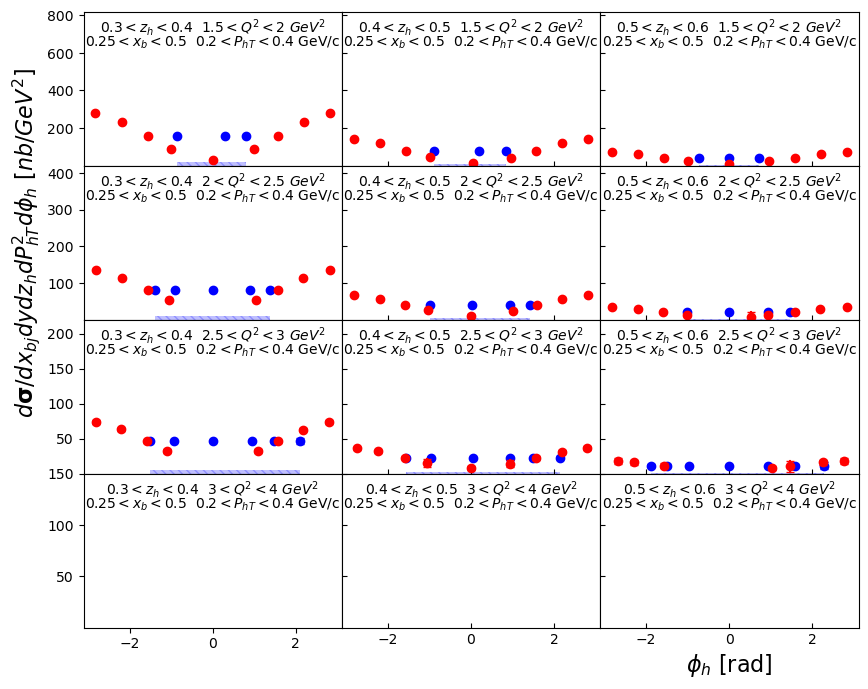

In [59]:
fig, axs = plt.subplots(4,3,figsize=(10,8),sharex=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

plt.xlabel('$\phi_h$ [rad]',fontsize=16)
#over large
Y_first_max=820;Y_second_max=420;Y_third_max=220;Y_fourth_max = 150
#Y_first_max=200;Y_second_max=100;Y_third_max=50;Y_fourth_max = 20
#large
#Y_first_max=0.18;Y_second_max=0.07;Y_third_max=0.024;Y_fourth_max = 0.012
#small2
#Y_first_max=0.04;Y_second_max=0.03;Y_third_max=0.02;Y_fourth_max = 0.012
#small
#Y_first_max=0.09;Y_second_max=0.04;Y_third_max=0.01;Y_fourth_max=0.006

for i_1_1 in range(0,len(phih_1_1)):
    _phih_1_1 = phih_1_1[i_1_1]
    _Fuu_1_1 = Fuu_1_1[i_1_1]
    _Fuu_1_1_stat = Fuu_1_1_stat[i_1_1]
    axs[0][0].plot([_phih_1_1,_phih_1_1],[_Fuu_1_1-_Fuu_1_1_stat,_Fuu_1_1+_Fuu_1_1_stat],color='blue',marker='_')
axs[0][0].plot(phih_1_1,Fuu_1_1,'bo')
axs[0][0].fill_between(phih_1_1,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_1_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_1_1_3xs in range(0,len(phih_1_1_3xs)):
    _phih_1_1 = phih_1_1_3xs[i_1_1_3xs]
    _Fuu_1_1 = Fuu_1_1_3xs[i_1_1_3xs]
    _Fuu_1_1_stat = Fuu_1_1_3xs_stat[i_1_1_3xs]
    axs[0][0].plot([_phih_1_1,_phih_1_1],[_Fuu_1_1-_Fuu_1_1_stat,_Fuu_1_1+_Fuu_1_1_stat],color='red',marker='_')
axs[0][0].plot(phih_1_1_3xs,Fuu_1_1_3xs,'ro')
#axs[0][0].fill_between(phih_1_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[0][0].set_ylim(0.0002,Y_first_max)
#axs[0][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[0][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
axs[0][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
for i_1_2 in range(0,len(phih_1_2)):
    _phih_1_2 = phih_1_2[i_1_2]
    _Fuu_1_2 = Fuu_1_2[i_1_2]
    _Fuu_1_2_stat = Fuu_1_2_stat[i_1_2]
    axs[0][1].plot([_phih_1_2,_phih_1_2],[_Fuu_1_2-_Fuu_1_2_stat,_Fuu_1_2+_Fuu_1_2_stat],color='blue',marker='_')
axs[0][1].plot(phih_1_2,Fuu_1_2,'bo')
axs[0][1].fill_between(phih_1_2,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_2_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_1_2_3xs in range(0,len(phih_1_2_3xs)):
    _phih_1_2 = phih_1_2_3xs[i_1_2_3xs]
    _Fuu_1_2 = Fuu_1_2_3xs[i_1_2_3xs]
    _Fuu_1_2_stat = Fuu_1_2_3xs_stat[i_1_2_3xs]
    axs[0][1].plot([_phih_1_2,_phih_1_2],[_Fuu_1_2-_Fuu_1_2_stat,_Fuu_1_2+_Fuu_1_2_stat],color='red',marker='_')
axs[0][1].plot(phih_1_2_3xs,Fuu_1_2_3xs,'ro')
#axs[0][1].fill_between(phih_1_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[0][1].set_ylim(0.0002,Y_first_max)
axs[0][1].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[0][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)
axs[0][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)
for i_1_3 in range(0,len(phih_1_3)):
    _phih_1_3 = phih_1_3[i_1_3]
    _Fuu_1_3 = Fuu_1_3[i_1_3]
    _Fuu_1_3_stat = Fuu_1_3_stat[i_1_3]
    axs[0][2].plot([_phih_1_3,_phih_1_3],[_Fuu_1_3-_Fuu_1_3_stat,_Fuu_1_3+_Fuu_1_3_stat],color='blue',marker='_')
axs[0][2].plot(phih_1_3,Fuu_1_3,'bo')
axs[0][2].fill_between(phih_1_3,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_3_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_1_3_3xs in range(0,len(phih_1_3_3xs)):
    _phih_1_3 = phih_1_3_3xs[i_1_3_3xs]
    _Fuu_1_3 = Fuu_1_3_3xs[i_1_3_3xs]
    _Fuu_1_3_stat = Fuu_1_3_3xs_stat[i_1_3_3xs]
    axs[0][2].plot([_phih_1_3,_phih_1_3],[_Fuu_1_3-_Fuu_1_3_stat,_Fuu_1_3+_Fuu_1_3_stat],color='red',marker='_')
axs[0][2].plot(phih_1_3_3xs,Fuu_1_3_3xs,'ro')
#axs[0][2].fill_between(phih_1_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[0][2].set_ylim(0.0002,Y_first_max)
axs[0][2].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[0][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)
axs[0][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)
for i_2_1 in range(0,len(phih_2_1)):
    _phih_2_1 = phih_2_1[i_2_1]
    _Fuu_2_1 = Fuu_2_1[i_2_1]
    _Fuu_2_1_stat = Fuu_2_1_stat[i_2_1]
    axs[1][0].plot([_phih_2_1,_phih_2_1],[_Fuu_2_1-_Fuu_2_1_stat,_Fuu_2_1+_Fuu_2_1_stat],color='blue',marker='_')
axs[1][0].plot(phih_2_1,Fuu_2_1,'bo')
axs[1][0].fill_between(phih_2_1,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_1_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_2_1_3xs in range(0,len(phih_2_1_3xs)):
    _phih_2_1 = phih_2_1_3xs[i_2_1_3xs]
    _Fuu_2_1 = Fuu_2_1_3xs[i_2_1_3xs]
    _Fuu_2_1_stat = Fuu_2_1_3xs_stat[i_2_1_3xs]
    axs[1][0].plot([_phih_2_1,_phih_2_1],[_Fuu_2_1-_Fuu_2_1_stat,_Fuu_2_1+_Fuu_2_1_stat],color='red',marker='_')
axs[1][0].plot(phih_2_1_3xs,Fuu_2_1_3xs,'ro')
#axs[1][0].fill_between(phih_2_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[1][0].set_ylim(0.0002,Y_second_max)
#axs[1][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[1][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)
axs[1][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)
for i_2_2 in range(0,len(phih_2_2)):
    _phih_2_2 = phih_2_2[i_2_2]
    _Fuu_2_2 = Fuu_2_2[i_2_2]
    _Fuu_2_2_stat = Fuu_2_2_stat[i_2_2]
    axs[1][1].plot([_phih_2_2,_phih_2_2],[_Fuu_2_2-_Fuu_2_2_stat,_Fuu_2_2+_Fuu_2_2_stat],color='blue',marker='_')
axs[1][1].plot(phih_2_2,Fuu_2_2,'bo')
axs[1][1].fill_between(phih_2_2,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_2_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_2_2_3xs in range(0,len(phih_2_2_3xs)):
    _phih_2_2 = phih_2_2_3xs[i_2_2_3xs]
    _Fuu_2_2 = Fuu_2_2_3xs[i_2_2_3xs]
    _Fuu_2_2_stat = Fuu_2_2_3xs_stat[i_2_2_3xs]
    axs[1][1].plot([_phih_2_2,_phih_2_2],[_Fuu_2_2-_Fuu_2_2_stat,_Fuu_2_2+_Fuu_2_2_stat],color='red',marker='_')
axs[1][1].plot(phih_2_2_3xs,Fuu_2_2_3xs,'ro')
#axs[1][1].fill_between(phih_2_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[1][1].set_ylim(0.0002,Y_second_max)
axs[1][1].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[1][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)
axs[1][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)
for i_2_3 in range(0,len(phih_2_3)):
    _phih_2_3 = phih_2_3[i_2_3]
    _Fuu_2_3 = Fuu_2_3[i_2_3]
    _Fuu_2_3_stat = Fuu_2_3_stat[i_2_3]
    axs[1][2].plot([_phih_2_3,_phih_2_3],[_Fuu_2_3-_Fuu_2_3_stat,_Fuu_2_3+_Fuu_2_3_stat],color='blue',marker='_')
axs[1][2].plot(phih_2_3,Fuu_2_3,'bo')
axs[1][2].fill_between(phih_2_3,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_3_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_2_3_3xs in range(0,len(phih_2_3_3xs)):
    _phih_2_3 = phih_2_3_3xs[i_2_3_3xs]
    _Fuu_2_3 = Fuu_2_3_3xs[i_2_3_3xs]
    _Fuu_2_3_stat = Fuu_2_3_3xs_stat[i_2_3_3xs]
    axs[1][2].plot([_phih_2_3,_phih_2_3],[_Fuu_2_3-_Fuu_2_3_stat,_Fuu_2_3+_Fuu_2_3_stat],color='red',marker='_')
axs[1][2].plot(phih_2_3_3xs,Fuu_2_3_3xs,'ro')
#axs[1][2].fill_between(phih_2_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[1][2].set_ylim(0.0002,Y_second_max)
axs[1][2].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[1][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)
axs[1][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)
for i_3_1 in range(0,len(phih_3_1)):
    _phih_3_1 = phih_3_1[i_3_1]
    _Fuu_3_1 = Fuu_3_1[i_3_1]
    _Fuu_3_1_stat = Fuu_3_1_stat[i_3_1]
    axs[2][0].plot([_phih_3_1,_phih_3_1],[_Fuu_3_1-_Fuu_3_1_stat,_Fuu_3_1+_Fuu_3_1_stat],color='blue',marker='_')
axs[2][0].plot(phih_3_1,Fuu_3_1,'bo')
axs[2][0].fill_between(phih_3_1,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_1_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_3_1_3xs in range(0,len(phih_3_1_3xs)):
    _phih_3_1 = phih_3_1_3xs[i_3_1_3xs]
    _Fuu_3_1 = Fuu_3_1_3xs[i_3_1_3xs]
    _Fuu_3_1_stat = Fuu_3_1_3xs_stat[i_3_1_3xs]
    axs[2][0].plot([_phih_3_1,_phih_3_1],[_Fuu_3_1-_Fuu_3_1_stat,_Fuu_3_1+_Fuu_3_1_stat],color='red',marker='_')
axs[2][0].plot(phih_3_1_3xs,Fuu_3_1_3xs,'ro')
#axs[2][0].fill_between(phih_3_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[2][0].set_ylim(0.0002,Y_third_max)
#axs[1][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[2][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)
axs[2][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)
for i_3_2 in range(0,len(phih_3_2)):
    _phih_3_2 = phih_3_2[i_3_2]
    _Fuu_3_2 = Fuu_3_2[i_3_2]
    _Fuu_3_2_stat = Fuu_3_2_stat[i_3_2]
    axs[2][1].plot([_phih_3_2,_phih_3_2],[_Fuu_3_2-_Fuu_3_2_stat,_Fuu_3_2+_Fuu_3_2_stat],color='blue',marker='_')
axs[2][1].plot(phih_3_2,Fuu_3_2,'bo')
axs[2][1].fill_between(phih_3_2,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_2_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_3_2_3xs in range(0,len(phih_3_2_3xs)):
    _phih_3_2 = phih_3_2_3xs[i_3_2_3xs]
    _Fuu_3_2 = Fuu_3_2_3xs[i_3_2_3xs]
    _Fuu_3_2_stat = Fuu_3_2_3xs_stat[i_3_2_3xs]
    axs[2][1].plot([_phih_3_2,_phih_3_2],[_Fuu_3_2-_Fuu_3_2_stat,_Fuu_3_2+_Fuu_3_2_stat],color='red',marker='_')
axs[2][1].plot(phih_3_2_3xs,Fuu_3_2_3xs,'ro')
#axs[2][1].fill_between(phih_3_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[2][1].set_ylim(0.0002,Y_third_max)
axs[2][1].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[2][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)
axs[2][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)
for i_3_3 in range(0,len(phih_3_3)):
    _phih_3_3 = phih_3_3[i_3_3]
    _Fuu_3_3 = Fuu_3_3[i_3_3]
    _Fuu_3_3_stat = Fuu_3_3_stat[i_3_3]
    axs[2][2].plot([_phih_3_3,_phih_3_3],[_Fuu_3_3-_Fuu_3_3_stat,_Fuu_3_3+_Fuu_3_3_stat],color='blue',marker='_')
axs[2][2].plot(phih_3_3,Fuu_3_3,'bo')
axs[2][2].fill_between(phih_3_3,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_3_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_3_3_3xs in range(0,len(phih_3_3_3xs)):
    _phih_3_3 = phih_3_3_3xs[i_3_3_3xs]
    _Fuu_3_3 = Fuu_3_3_3xs[i_3_3_3xs]
    _Fuu_3_3_stat = Fuu_3_3_3xs_stat[i_3_3_3xs]
    axs[2][2].plot([_phih_3_3,_phih_3_3],[_Fuu_3_3-_Fuu_3_3_stat,_Fuu_3_3+_Fuu_3_3_stat],color='red',marker='_')
axs[2][2].plot(phih_3_3_3xs,Fuu_3_3_3xs,'ro')
#axs[2][2].fill_between(phih_3_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[2][2].set_ylim(0.0002,Y_third_max)
axs[2][2].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[2][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)
axs[2][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)
for i_4_1 in range(0,len(phih_4_1)):
    _phih_4_1 = phih_4_1[i_4_1]
    _Fuu_4_1 = Fuu_4_1[i_4_1]
    _Fuu_4_1_stat = Fuu_4_1_stat[i_4_1]
    axs[3][0].plot([_phih_4_1,_phih_4_1],[_Fuu_4_1-_Fuu_4_1_stat,_Fuu_4_1+_Fuu_4_1_stat],color='blue',marker='_')
axs[3][0].plot(phih_4_1,Fuu_4_1,'bo')
axs[3][0].fill_between(phih_4_1,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_1_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_4_1_3xs in range(0,len(phih_4_1_3xs)):
    _phih_4_1 = phih_4_1_3xs[i_4_1_3xs]
    _Fuu_4_1 = Fuu_4_1_3xs[i_4_1_3xs]
    _Fuu_4_1_stat = Fuu_4_1_3xs_stat[i_4_1_3xs]
    axs[3][0].plot([_phih_4_1,_phih_4_1],[_Fuu_4_1-_Fuu_4_1_stat,_Fuu_4_1+_Fuu_4_1_stat],color='red',marker='_')
axs[3][0].plot(phih_4_1_3xs,Fuu_4_1_3xs,'ro')
#axs[3][0].fill_between(phih_4_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[3][0].set_ylim(0.0002,Y_fourth_max)
#axs[3][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[3][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][0].transAxes)
axs[3][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][0].transAxes)
for i_4_2 in range(0,len(phih_4_2)):
    _phih_4_2 = phih_4_2[i_4_2]
    _Fuu_4_2 = Fuu_4_2[i_4_2]
    _Fuu_4_2_stat = Fuu_4_2_stat[i_4_2]
    axs[3][1].plot([_phih_4_2,_phih_4_2],[_Fuu_4_2-_Fuu_4_2_stat,_Fuu_4_2+_Fuu_4_2_stat],color='blue',marker='_')
axs[3][1].plot(phih_4_2,Fuu_4_2,'bo')
axs[3][1].fill_between(phih_4_2,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_2_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_4_2_3xs in range(0,len(phih_4_2_3xs)):
    _phih_4_2 = phih_4_2_3xs[i_4_2_3xs]
    _Fuu_4_2 = Fuu_4_2_3xs[i_4_2_3xs]
    _Fuu_4_2_stat = Fuu_4_2_3xs_stat[i_4_2_3xs]
    axs[3][1].plot([_phih_4_2,_phih_4_2],[_Fuu_4_2-_Fuu_4_2_stat,_Fuu_4_2+_Fuu_4_2_stat],color='red',marker='_')
axs[3][1].plot(phih_4_2_3xs,Fuu_4_2_3xs,'ro')
#axs[3][1].fill_between(phih_4_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[3][1].set_ylim(0.0002,Y_fourth_max)
axs[3][1].tick_params(direction='in',labelleft=False)
axs[3][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][1].transAxes)
axs[3][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][1].transAxes)
for i_4_3 in range(0,len(phih_4_3)):
    _phih_4_3 = phih_4_3[i_4_3]
    _Fuu_4_3 = Fuu_4_3[i_4_3]
    _Fuu_4_3_stat = Fuu_4_3_stat[i_4_3]
    axs[3][2].plot([_phih_4_3,_phih_4_3],[_Fuu_4_3-_Fuu_4_3_stat,_Fuu_4_3+_Fuu_4_3_stat],color='blue',marker='_')
axs[3][2].plot(phih_4_3,Fuu_4_3,'bo')
axs[3][2].fill_between(phih_4_3,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_3_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)

for i_4_3_3xs in range(0,len(phih_4_3_3xs)):
    _phih_4_3 = phih_4_3_3xs[i_4_3_3xs]
    _Fuu_4_3 = Fuu_4_3_3xs[i_4_3_3xs]
    _Fuu_4_3_stat = Fuu_4_3_3xs_stat[i_4_3_3xs]
    axs[3][2].plot([_phih_4_3,_phih_4_3],[_Fuu_4_3-_Fuu_4_3_stat,_Fuu_4_3+_Fuu_4_3_stat],color='red',marker='_')
axs[3][2].plot(phih_4_3_3xs,Fuu_4_3_3xs,'ro')
#axs[3][2].fill_between(phih_4_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[3][2].set_ylim(0.0002,Y_fourth_max)
axs[3][2].tick_params(direction='in',labelleft=False)
axs[3][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][2].transAxes)
axs[3][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][2].transAxes)

axs[1][0].set_ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}d\phi_h}$ [$nb/GeV^2$]',fontsize=16)


#plt.show()
plt.savefig('../Unpol_proposal/Materials/results/Fuu_large_PT4_pim_12.pdf')

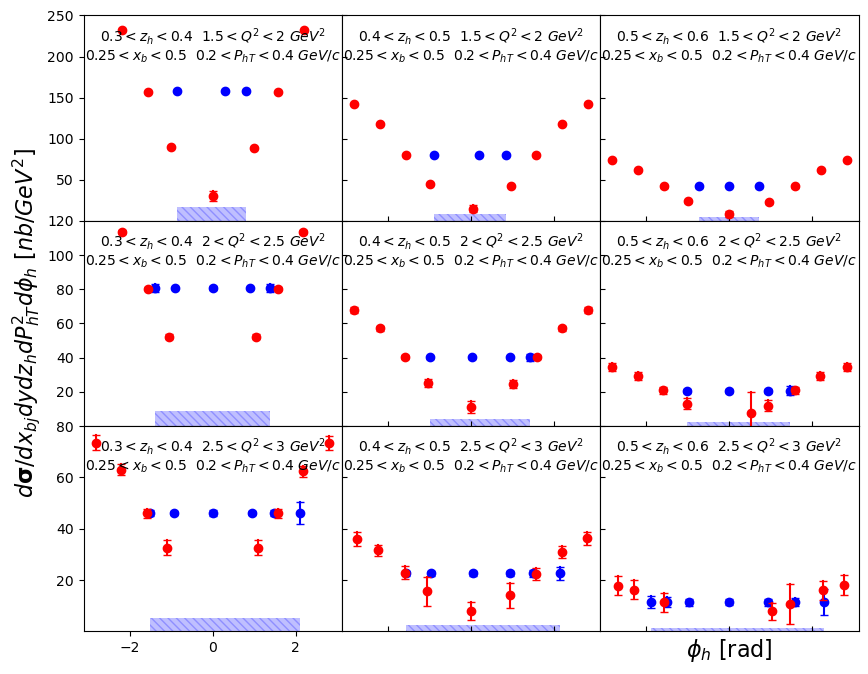

In [60]:
#for 8.8 GeV, last row is removed
fig, axs = plt.subplots(3,3,figsize=(10,8),sharex=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

plt.xlabel('$\phi_h$ [rad]',fontsize=16)
#over large
#Y_first_max=700;Y_second_max=420;Y_third_max=220;Y_fourth_max = 150
Y_first_max=250;Y_second_max=120;Y_third_max=80;Y_fourth_max = 20
#large
#Y_first_max=0.18;Y_second_max=0.07;Y_third_max=0.024;Y_fourth_max = 0.012
#small2
#Y_first_max=0.04;Y_second_max=0.03;Y_third_max=0.02;Y_fourth_max = 0.012
#small
#Y_first_max=0.09;Y_second_max=0.04;Y_third_max=0.01;Y_fourth_max=0.006

for i_1_1 in range(0,len(phih_1_1)):
    _phih_1_1 = phih_1_1[i_1_1]
    _Fuu_1_1 = Fuu_1_1[i_1_1]
    _Fuu_1_1_stat = Fuu_1_1_stat[i_1_1]
    axs[0][0].plot([_phih_1_1,_phih_1_1],[_Fuu_1_1-_Fuu_1_1_stat,_Fuu_1_1+_Fuu_1_1_stat],color='blue',marker='_')
axs[0][0].plot(phih_1_1,Fuu_1_1,'bo')
axs[0][0].fill_between(phih_1_1,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_1_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_1_1_3xs in range(0,len(phih_1_1_3xs)):
    _phih_1_1 = phih_1_1_3xs[i_1_1_3xs]
    _Fuu_1_1 = Fuu_1_1_3xs[i_1_1_3xs]
    _Fuu_1_1_stat = Fuu_1_1_3xs_stat[i_1_1_3xs]
    axs[0][0].plot([_phih_1_1,_phih_1_1],[_Fuu_1_1-_Fuu_1_1_stat,_Fuu_1_1+_Fuu_1_1_stat],color='red',marker='_')
axs[0][0].plot(phih_1_1_3xs,Fuu_1_1_3xs,'ro')
#axs[0][0].fill_between(phih_1_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[0][0].set_ylim(0.0002,Y_first_max)
#axs[0][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[0][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
axs[0][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ $GeV/c$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
for i_1_2 in range(0,len(phih_1_2)):
    _phih_1_2 = phih_1_2[i_1_2]
    _Fuu_1_2 = Fuu_1_2[i_1_2]
    _Fuu_1_2_stat = Fuu_1_2_stat[i_1_2]
    axs[0][1].plot([_phih_1_2,_phih_1_2],[_Fuu_1_2-_Fuu_1_2_stat,_Fuu_1_2+_Fuu_1_2_stat],color='blue',marker='_')
axs[0][1].plot(phih_1_2,Fuu_1_2,'bo')
axs[0][1].fill_between(phih_1_2,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_2_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_1_2_3xs in range(0,len(phih_1_2_3xs)):
    _phih_1_2 = phih_1_2_3xs[i_1_2_3xs]
    _Fuu_1_2 = Fuu_1_2_3xs[i_1_2_3xs]
    _Fuu_1_2_stat = Fuu_1_2_3xs_stat[i_1_2_3xs]
    axs[0][1].plot([_phih_1_2,_phih_1_2],[_Fuu_1_2-_Fuu_1_2_stat,_Fuu_1_2+_Fuu_1_2_stat],color='red',marker='_')
axs[0][1].plot(phih_1_2_3xs,Fuu_1_2_3xs,'ro')
#axs[0][1].fill_between(phih_1_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[0][1].set_ylim(0.0002,Y_first_max)
axs[0][1].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[0][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)
axs[0][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ $GeV/c$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)
for i_1_3 in range(0,len(phih_1_3)):
    _phih_1_3 = phih_1_3[i_1_3]
    _Fuu_1_3 = Fuu_1_3[i_1_3]
    _Fuu_1_3_stat = Fuu_1_3_stat[i_1_3]
    axs[0][2].plot([_phih_1_3,_phih_1_3],[_Fuu_1_3-_Fuu_1_3_stat,_Fuu_1_3+_Fuu_1_3_stat],color='blue',marker='_')
axs[0][2].plot(phih_1_3,Fuu_1_3,'bo')
axs[0][2].fill_between(phih_1_3,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_3_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_1_3_3xs in range(0,len(phih_1_3_3xs)):
    _phih_1_3 = phih_1_3_3xs[i_1_3_3xs]
    _Fuu_1_3 = Fuu_1_3_3xs[i_1_3_3xs]
    _Fuu_1_3_stat = Fuu_1_3_3xs_stat[i_1_3_3xs]
    axs[0][2].plot([_phih_1_3,_phih_1_3],[_Fuu_1_3-_Fuu_1_3_stat,_Fuu_1_3+_Fuu_1_3_stat],color='red',marker='_')
axs[0][2].plot(phih_1_3_3xs,Fuu_1_3_3xs,'ro')
#axs[0][2].fill_between(phih_1_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[0][2].set_ylim(0.0002,Y_first_max)
axs[0][2].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[0][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)
axs[0][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ $GeV/c$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)
for i_2_1 in range(0,len(phih_2_1)):
    _phih_2_1 = phih_2_1[i_2_1]
    _Fuu_2_1 = Fuu_2_1[i_2_1]
    _Fuu_2_1_stat = Fuu_2_1_stat[i_2_1]
    axs[1][0].plot([_phih_2_1,_phih_2_1],[_Fuu_2_1-_Fuu_2_1_stat,_Fuu_2_1+_Fuu_2_1_stat],color='blue',marker='_')
axs[1][0].plot(phih_2_1,Fuu_2_1,'bo')
axs[1][0].fill_between(phih_2_1,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_1_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_2_1_3xs in range(0,len(phih_2_1_3xs)):
    _phih_2_1 = phih_2_1_3xs[i_2_1_3xs]
    _Fuu_2_1 = Fuu_2_1_3xs[i_2_1_3xs]
    _Fuu_2_1_stat = Fuu_2_1_3xs_stat[i_2_1_3xs]
    axs[1][0].plot([_phih_2_1,_phih_2_1],[_Fuu_2_1-_Fuu_2_1_stat,_Fuu_2_1+_Fuu_2_1_stat],color='red',marker='_')
axs[1][0].plot(phih_2_1_3xs,Fuu_2_1_3xs,'ro')
#axs[1][0].fill_between(phih_2_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[1][0].set_ylim(0.0002,Y_second_max)
#axs[1][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[1][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)
axs[1][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ $GeV/c$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)
for i_2_2 in range(0,len(phih_2_2)):
    _phih_2_2 = phih_2_2[i_2_2]
    _Fuu_2_2 = Fuu_2_2[i_2_2]
    _Fuu_2_2_stat = Fuu_2_2_stat[i_2_2]
    axs[1][1].plot([_phih_2_2,_phih_2_2],[_Fuu_2_2-_Fuu_2_2_stat,_Fuu_2_2+_Fuu_2_2_stat],color='blue',marker='_')
axs[1][1].plot(phih_2_2,Fuu_2_2,'bo')
axs[1][1].fill_between(phih_2_2,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_2_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_2_2_3xs in range(0,len(phih_2_2_3xs)):
    _phih_2_2 = phih_2_2_3xs[i_2_2_3xs]
    _Fuu_2_2 = Fuu_2_2_3xs[i_2_2_3xs]
    _Fuu_2_2_stat = Fuu_2_2_3xs_stat[i_2_2_3xs]
    axs[1][1].plot([_phih_2_2,_phih_2_2],[_Fuu_2_2-_Fuu_2_2_stat,_Fuu_2_2+_Fuu_2_2_stat],color='red',marker='_')
axs[1][1].plot(phih_2_2_3xs,Fuu_2_2_3xs,'ro')
#axs[1][1].fill_between(phih_2_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[1][1].set_ylim(0.0002,Y_second_max)
axs[1][1].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[1][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)
axs[1][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ $GeV/c$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)
for i_2_3 in range(0,len(phih_2_3)):
    _phih_2_3 = phih_2_3[i_2_3]
    _Fuu_2_3 = Fuu_2_3[i_2_3]
    _Fuu_2_3_stat = Fuu_2_3_stat[i_2_3]
    axs[1][2].plot([_phih_2_3,_phih_2_3],[_Fuu_2_3-_Fuu_2_3_stat,_Fuu_2_3+_Fuu_2_3_stat],color='blue',marker='_')
axs[1][2].plot(phih_2_3,Fuu_2_3,'bo')
axs[1][2].fill_between(phih_2_3,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_3_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_2_3_3xs in range(0,len(phih_2_3_3xs)):
    _phih_2_3 = phih_2_3_3xs[i_2_3_3xs]
    _Fuu_2_3 = Fuu_2_3_3xs[i_2_3_3xs]
    _Fuu_2_3_stat = Fuu_2_3_3xs_stat[i_2_3_3xs]
    axs[1][2].plot([_phih_2_3,_phih_2_3],[_Fuu_2_3-_Fuu_2_3_stat,_Fuu_2_3+_Fuu_2_3_stat],color='red',marker='_')
axs[1][2].plot(phih_2_3_3xs,Fuu_2_3_3xs,'ro')
#axs[1][2].fill_between(phih_2_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[1][2].set_ylim(0.0002,Y_second_max)
axs[1][2].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[1][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)
axs[1][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ $GeV/c$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)
for i_3_1 in range(0,len(phih_3_1)):
    _phih_3_1 = phih_3_1[i_3_1]
    _Fuu_3_1 = Fuu_3_1[i_3_1]
    _Fuu_3_1_stat = Fuu_3_1_stat[i_3_1]
    axs[2][0].plot([_phih_3_1,_phih_3_1],[_Fuu_3_1-_Fuu_3_1_stat,_Fuu_3_1+_Fuu_3_1_stat],color='blue',marker='_')
axs[2][0].plot(phih_3_1,Fuu_3_1,'bo')
axs[2][0].fill_between(phih_3_1,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_1_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_3_1_3xs in range(0,len(phih_3_1_3xs)):
    _phih_3_1 = phih_3_1_3xs[i_3_1_3xs]
    _Fuu_3_1 = Fuu_3_1_3xs[i_3_1_3xs]
    _Fuu_3_1_stat = Fuu_3_1_3xs_stat[i_3_1_3xs]
    axs[2][0].plot([_phih_3_1,_phih_3_1],[_Fuu_3_1-_Fuu_3_1_stat,_Fuu_3_1+_Fuu_3_1_stat],color='red',marker='_')
axs[2][0].plot(phih_3_1_3xs,Fuu_3_1_3xs,'ro')
#axs[2][0].fill_between(phih_3_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[2][0].set_ylim(0.0002,Y_third_max)
#axs[1][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[2][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)
axs[2][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ $GeV/c$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)
for i_3_2 in range(0,len(phih_3_2)):
    _phih_3_2 = phih_3_2[i_3_2]
    _Fuu_3_2 = Fuu_3_2[i_3_2]
    _Fuu_3_2_stat = Fuu_3_2_stat[i_3_2]
    axs[2][1].plot([_phih_3_2,_phih_3_2],[_Fuu_3_2-_Fuu_3_2_stat,_Fuu_3_2+_Fuu_3_2_stat],color='blue',marker='_')
axs[2][1].plot(phih_3_2,Fuu_3_2,'bo')
axs[2][1].fill_between(phih_3_2,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_2_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_3_2_3xs in range(0,len(phih_3_2_3xs)):
    _phih_3_2 = phih_3_2_3xs[i_3_2_3xs]
    _Fuu_3_2 = Fuu_3_2_3xs[i_3_2_3xs]
    _Fuu_3_2_stat = Fuu_3_2_3xs_stat[i_3_2_3xs]
    axs[2][1].plot([_phih_3_2,_phih_3_2],[_Fuu_3_2-_Fuu_3_2_stat,_Fuu_3_2+_Fuu_3_2_stat],color='red',marker='_')
axs[2][1].plot(phih_3_2_3xs,Fuu_3_2_3xs,'ro')
#axs[2][1].fill_between(phih_3_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[2][1].set_ylim(0.0002,Y_third_max)
axs[2][1].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[2][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)
axs[2][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ $GeV/c$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)
for i_3_3 in range(0,len(phih_3_3)):
    _phih_3_3 = phih_3_3[i_3_3]
    _Fuu_3_3 = Fuu_3_3[i_3_3]
    _Fuu_3_3_stat = Fuu_3_3_stat[i_3_3]
    axs[2][2].plot([_phih_3_3,_phih_3_3],[_Fuu_3_3-_Fuu_3_3_stat,_Fuu_3_3+_Fuu_3_3_stat],color='blue',marker='_')
axs[2][2].plot(phih_3_3,Fuu_3_3,'bo')
axs[2][2].fill_between(phih_3_3,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_3_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_3_3_3xs in range(0,len(phih_3_3_3xs)):
    _phih_3_3 = phih_3_3_3xs[i_3_3_3xs]
    _Fuu_3_3 = Fuu_3_3_3xs[i_3_3_3xs]
    _Fuu_3_3_stat = Fuu_3_3_3xs_stat[i_3_3_3xs]
    axs[2][2].plot([_phih_3_3,_phih_3_3],[_Fuu_3_3-_Fuu_3_3_stat,_Fuu_3_3+_Fuu_3_3_stat],color='red',marker='_')
axs[2][2].plot(phih_3_3_3xs,Fuu_3_3_3xs,'ro')
#axs[2][2].fill_between(phih_3_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[2][2].set_ylim(0.0002,Y_third_max)
axs[2][2].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[2][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)
axs[2][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ $GeV/c$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)

axs[1][0].set_ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}d\phi_h}$ [$nb/GeV^2$]',fontsize=16)


#plt.show()
plt.savefig('../Unpol_proposal/Materials/results/Fuu_large_PT4_pim.pdf')

Text(0, 0.5, '${d \\bf{\\sigma}}/{dzdydxdp^2_{T}d\\phi_h}$ [$nb/GeV^2$]')

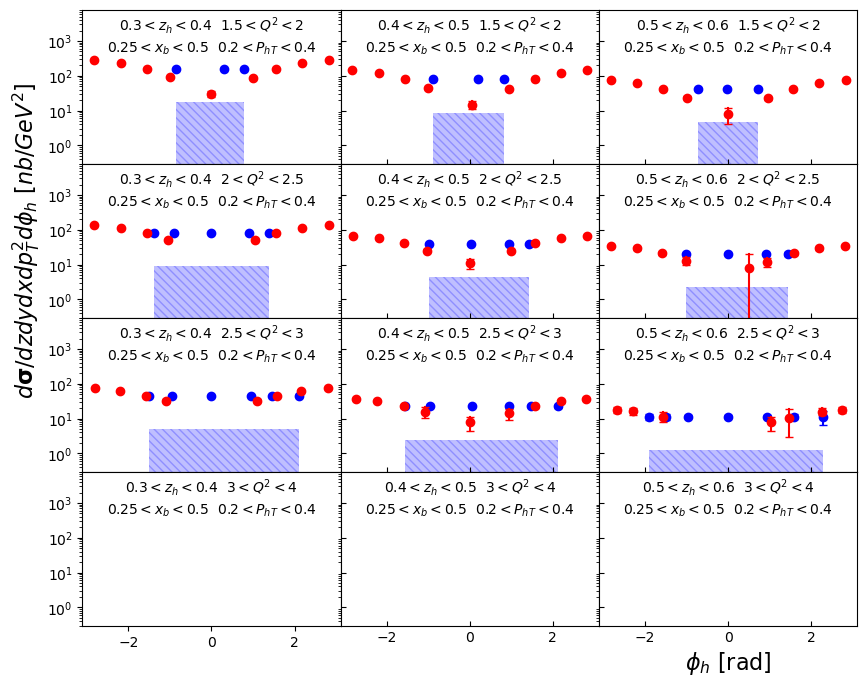

In [61]:
fig, axs = plt.subplots(4,3,figsize=(10,8),sharex=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.yscale('log')
plt.xlabel('$\phi_h$ [rad]',fontsize=16)
#over large
Y_first_max=8e3;Y_second_max=8e3;Y_third_max=8e3;Y_fourth_max=8e3
#Y_first_min=3;Y_second_min=1.1;Y_third_min=0.7;Y_fourth_min=0.09
Y_first_min=.3;Y_second_min=.3;Y_third_min=.3;Y_fourth_min=.3
#large
#Y_first_max=0.18;Y_second_max=0.07;Y_third_max=0.024;Y_fourth_max = 0.012
#small2
#Y_first_max=0.04;Y_second_max=0.03;Y_third_max=0.02;Y_fourth_max = 0.012
#small
#Y_first_max=0.09;Y_second_max=0.04;Y_third_max=0.01;Y_fourth_max=0.006

for i_1_1 in range(0,len(phih_1_1)):
    _phih_1_1 = phih_1_1[i_1_1]
    _Fuu_1_1 = Fuu_1_1[i_1_1]
    _Fuu_1_1_stat = Fuu_1_1_stat[i_1_1]
    axs[0][0].plot([_phih_1_1,_phih_1_1],[_Fuu_1_1-_Fuu_1_1_stat,_Fuu_1_1+_Fuu_1_1_stat],color='blue',marker='_')
axs[0][0].plot(phih_1_1,Fuu_1_1,'bo')
axs[0][0].fill_between(phih_1_1,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_1_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_1_1_3xs in range(0,len(phih_1_1_3xs)):
    _phih_1_1 = phih_1_1_3xs[i_1_1_3xs]
    _Fuu_1_1 = Fuu_1_1_3xs[i_1_1_3xs]
    _Fuu_1_1_stat = Fuu_1_1_3xs_stat[i_1_1_3xs]
    axs[0][0].plot([_phih_1_1,_phih_1_1],[_Fuu_1_1-_Fuu_1_1_stat,_Fuu_1_1+_Fuu_1_1_stat],color='red',marker='_')
axs[0][0].plot(phih_1_1_3xs,Fuu_1_1_3xs,'ro')
#axs[0][0].fill_between(phih_1_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[0][0].set_yscale('log')
axs[0][0].set_ylim(Y_first_min,Y_first_max)
#axs[0][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[0][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$'.format(z_cuts[0],z_cuts[1],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
axs[0][0].text(0.5,0.75,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
for i_1_2 in range(0,len(phih_1_2)):
    _phih_1_2 = phih_1_2[i_1_2]
    _Fuu_1_2 = Fuu_1_2[i_1_2]
    _Fuu_1_2_stat = Fuu_1_2_stat[i_1_2]
    axs[0][1].plot([_phih_1_2,_phih_1_2],[_Fuu_1_2-_Fuu_1_2_stat,_Fuu_1_2+_Fuu_1_2_stat],color='blue',marker='_')
axs[0][1].plot(phih_1_2,Fuu_1_2,'bo')
axs[0][1].fill_between(phih_1_2,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_2_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_1_2_3xs in range(0,len(phih_1_2_3xs)):
    _phih_1_2 = phih_1_2_3xs[i_1_2_3xs]
    _Fuu_1_2 = Fuu_1_2_3xs[i_1_2_3xs]
    _Fuu_1_2_stat = Fuu_1_2_3xs_stat[i_1_2_3xs]
    axs[0][1].plot([_phih_1_2,_phih_1_2],[_Fuu_1_2-_Fuu_1_2_stat,_Fuu_1_2+_Fuu_1_2_stat],color='red',marker='_')
axs[0][1].plot(phih_1_2_3xs,Fuu_1_2_3xs,'ro')
#axs[0][1].fill_between(phih_1_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[0][1].set_yscale('log')
axs[0][1].set_ylim(Y_first_min,Y_first_max)
axs[0][1].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[0][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$'.format(z_cuts[1],z_cuts[2],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)
axs[0][1].text(0.5,0.75,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)
for i_1_3 in range(0,len(phih_1_3)):
    _phih_1_3 = phih_1_3[i_1_3]
    _Fuu_1_3 = Fuu_1_3[i_1_3]
    _Fuu_1_3_stat = Fuu_1_3_stat[i_1_3]
    axs[0][2].plot([_phih_1_3,_phih_1_3],[_Fuu_1_3-_Fuu_1_3_stat,_Fuu_1_3+_Fuu_1_3_stat],color='blue',marker='_')
axs[0][2].plot(phih_1_3,Fuu_1_3,'bo')
axs[0][2].fill_between(phih_1_3,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_3_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_1_3_3xs in range(0,len(phih_1_3_3xs)):
    _phih_1_3 = phih_1_3_3xs[i_1_3_3xs]
    _Fuu_1_3 = Fuu_1_3_3xs[i_1_3_3xs]
    _Fuu_1_3_stat = Fuu_1_3_3xs_stat[i_1_3_3xs]
    axs[0][2].plot([_phih_1_3,_phih_1_3],[_Fuu_1_3-_Fuu_1_3_stat,_Fuu_1_3+_Fuu_1_3_stat],color='red',marker='_')
axs[0][2].plot(phih_1_3_3xs,Fuu_1_3_3xs,'ro')
#axs[0][2].fill_between(phih_1_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[0][2].set_yscale('log')
axs[0][2].set_ylim(Y_first_min,Y_first_max)
axs[0][2].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[0][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$'.format(z_cuts[2],z_cuts[3],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)
axs[0][2].text(0.5,0.75,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)
for i_2_1 in range(0,len(phih_2_1)):
    _phih_2_1 = phih_2_1[i_2_1]
    _Fuu_2_1 = Fuu_2_1[i_2_1]
    _Fuu_2_1_stat = Fuu_2_1_stat[i_2_1]
    axs[1][0].plot([_phih_2_1,_phih_2_1],[_Fuu_2_1-_Fuu_2_1_stat,_Fuu_2_1+_Fuu_2_1_stat],color='blue',marker='_')
axs[1][0].plot(phih_2_1,Fuu_2_1,'bo')
axs[1][0].fill_between(phih_2_1,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_1_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_2_1_3xs in range(0,len(phih_2_1_3xs)):
    _phih_2_1 = phih_2_1_3xs[i_2_1_3xs]
    _Fuu_2_1 = Fuu_2_1_3xs[i_2_1_3xs]
    _Fuu_2_1_stat = Fuu_2_1_3xs_stat[i_2_1_3xs]
    axs[1][0].plot([_phih_2_1,_phih_2_1],[_Fuu_2_1-_Fuu_2_1_stat,_Fuu_2_1+_Fuu_2_1_stat],color='red',marker='_')
axs[1][0].plot(phih_2_1_3xs,Fuu_2_1_3xs,'ro')
#axs[1][0].fill_between(phih_2_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[1][0].set_yscale('log')
axs[1][0].set_ylim(Y_second_min,Y_second_max)
#axs[1][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[1][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$'.format(z_cuts[0],z_cuts[1],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)
axs[1][0].text(0.5,0.75,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)
for i_2_2 in range(0,len(phih_2_2)):
    _phih_2_2 = phih_2_2[i_2_2]
    _Fuu_2_2 = Fuu_2_2[i_2_2]
    _Fuu_2_2_stat = Fuu_2_2_stat[i_2_2]
    axs[1][1].plot([_phih_2_2,_phih_2_2],[_Fuu_2_2-_Fuu_2_2_stat,_Fuu_2_2+_Fuu_2_2_stat],color='blue',marker='_')
axs[1][1].plot(phih_2_2,Fuu_2_2,'bo')
axs[1][1].fill_between(phih_2_2,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_2_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_2_2_3xs in range(0,len(phih_2_2_3xs)):
    _phih_2_2 = phih_2_2_3xs[i_2_2_3xs]
    _Fuu_2_2 = Fuu_2_2_3xs[i_2_2_3xs]
    _Fuu_2_2_stat = Fuu_2_2_3xs_stat[i_2_2_3xs]
    axs[1][1].plot([_phih_2_2,_phih_2_2],[_Fuu_2_2-_Fuu_2_2_stat,_Fuu_2_2+_Fuu_2_2_stat],color='red',marker='_')
axs[1][1].plot(phih_2_2_3xs,Fuu_2_2_3xs,'ro')
#axs[1][1].fill_between(phih_2_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[1][1].set_yscale('log')
axs[1][1].set_ylim(Y_second_min,Y_second_max)
axs[1][1].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[1][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$'.format(z_cuts[1],z_cuts[2],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)
axs[1][1].text(0.5,0.75,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)
for i_2_3 in range(0,len(phih_2_3)):
    _phih_2_3 = phih_2_3[i_2_3]
    _Fuu_2_3 = Fuu_2_3[i_2_3]
    _Fuu_2_3_stat = Fuu_2_3_stat[i_2_3]
    axs[1][2].plot([_phih_2_3,_phih_2_3],[_Fuu_2_3-_Fuu_2_3_stat,_Fuu_2_3+_Fuu_2_3_stat],color='blue',marker='_')
axs[1][2].plot(phih_2_3,Fuu_2_3,'bo')
axs[1][2].fill_between(phih_2_3,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_3_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_2_3_3xs in range(0,len(phih_2_3_3xs)):
    _phih_2_3 = phih_2_3_3xs[i_2_3_3xs]
    _Fuu_2_3 = Fuu_2_3_3xs[i_2_3_3xs]
    _Fuu_2_3_stat = Fuu_2_3_3xs_stat[i_2_3_3xs]
    axs[1][2].plot([_phih_2_3,_phih_2_3],[_Fuu_2_3-_Fuu_2_3_stat,_Fuu_2_3+_Fuu_2_3_stat],color='red',marker='_')
axs[1][2].plot(phih_2_3_3xs,Fuu_2_3_3xs,'ro')
#axs[1][2].fill_between(phih_2_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[1][2].set_yscale('log')
axs[1][2].set_ylim(Y_second_min,Y_second_max)
axs[1][2].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[1][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$'.format(z_cuts[2],z_cuts[3],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)
axs[1][2].text(0.5,0.75,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)
for i_3_1 in range(0,len(phih_3_1)):
    _phih_3_1 = phih_3_1[i_3_1]
    _Fuu_3_1 = Fuu_3_1[i_3_1]
    _Fuu_3_1_stat = Fuu_3_1_stat[i_3_1]
    axs[2][0].plot([_phih_3_1,_phih_3_1],[_Fuu_3_1-_Fuu_3_1_stat,_Fuu_3_1+_Fuu_3_1_stat],color='blue',marker='_')
axs[2][0].plot(phih_3_1,Fuu_3_1,'bo')
axs[2][0].fill_between(phih_3_1,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_1_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_3_1_3xs in range(0,len(phih_3_1_3xs)):
    _phih_3_1 = phih_3_1_3xs[i_3_1_3xs]
    _Fuu_3_1 = Fuu_3_1_3xs[i_3_1_3xs]
    _Fuu_3_1_stat = Fuu_3_1_3xs_stat[i_3_1_3xs]
    axs[2][0].plot([_phih_3_1,_phih_3_1],[_Fuu_3_1-_Fuu_3_1_stat,_Fuu_3_1+_Fuu_3_1_stat],color='red',marker='_')
axs[2][0].plot(phih_3_1_3xs,Fuu_3_1_3xs,'ro')
#axs[2][0].fill_between(phih_3_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[2][0].set_yscale('log')
axs[2][0].set_ylim(Y_third_min,Y_third_max)
#axs[1][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[2][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$'.format(z_cuts[0],z_cuts[1],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)
axs[2][0].text(0.5,0.75,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)
for i_3_2 in range(0,len(phih_3_2)):
    _phih_3_2 = phih_3_2[i_3_2]
    _Fuu_3_2 = Fuu_3_2[i_3_2]
    _Fuu_3_2_stat = Fuu_3_2_stat[i_3_2]
    axs[2][1].plot([_phih_3_2,_phih_3_2],[_Fuu_3_2-_Fuu_3_2_stat,_Fuu_3_2+_Fuu_3_2_stat],color='blue',marker='_')
axs[2][1].plot(phih_3_2,Fuu_3_2,'bo')
axs[2][1].fill_between(phih_3_2,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_2_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_3_2_3xs in range(0,len(phih_3_2_3xs)):
    _phih_3_2 = phih_3_2_3xs[i_3_2_3xs]
    _Fuu_3_2 = Fuu_3_2_3xs[i_3_2_3xs]
    _Fuu_3_2_stat = Fuu_3_2_3xs_stat[i_3_2_3xs]
    axs[2][1].plot([_phih_3_2,_phih_3_2],[_Fuu_3_2-_Fuu_3_2_stat,_Fuu_3_2+_Fuu_3_2_stat],color='red',marker='_')
axs[2][1].plot(phih_3_2_3xs,Fuu_3_2_3xs,'ro')
#axs[2][1].fill_between(phih_3_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[2][1].set_yscale('log')
axs[2][1].set_ylim(Y_third_min,Y_third_max)
axs[2][1].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[2][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$'.format(z_cuts[1],z_cuts[2],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)
axs[2][1].text(0.5,0.75,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)
for i_3_3 in range(0,len(phih_3_3)):
    _phih_3_3 = phih_3_3[i_3_3]
    _Fuu_3_3 = Fuu_3_3[i_3_3]
    _Fuu_3_3_stat = Fuu_3_3_stat[i_3_3]
    axs[2][2].plot([_phih_3_3,_phih_3_3],[_Fuu_3_3-_Fuu_3_3_stat,_Fuu_3_3+_Fuu_3_3_stat],color='blue',marker='_')
axs[2][2].plot(phih_3_3,Fuu_3_3,'bo')
axs[2][2].fill_between(phih_3_3,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_3_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_3_3_3xs in range(0,len(phih_3_3_3xs)):
    _phih_3_3 = phih_3_3_3xs[i_3_3_3xs]
    _Fuu_3_3 = Fuu_3_3_3xs[i_3_3_3xs]
    _Fuu_3_3_stat = Fuu_3_3_3xs_stat[i_3_3_3xs]
    axs[2][2].plot([_phih_3_3,_phih_3_3],[_Fuu_3_3-_Fuu_3_3_stat,_Fuu_3_3+_Fuu_3_3_stat],color='red',marker='_')
axs[2][2].plot(phih_3_3_3xs,Fuu_3_3_3xs,'ro')
#axs[2][2].fill_between(phih_3_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[2][2].set_yscale('log')
axs[2][2].set_ylim(Y_third_min,Y_third_max)
axs[2][2].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[2][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$'.format(z_cuts[2],z_cuts[3],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)
axs[2][2].text(0.5,0.75,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)
for i_4_1 in range(0,len(phih_4_1)):
    _phih_4_1 = phih_4_1[i_4_1]
    _Fuu_4_1 = Fuu_4_1[i_4_1]
    _Fuu_4_1_stat = Fuu_4_1_stat[i_4_1]
    axs[3][0].plot([_phih_4_1,_phih_4_1],[_Fuu_4_1-_Fuu_4_1_stat,_Fuu_4_1+_Fuu_4_1_stat],color='blue',marker='_')
axs[3][0].plot(phih_4_1,Fuu_4_1,'bo')
axs[3][0].fill_between(phih_4_1,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_1_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_4_1_3xs in range(0,len(phih_4_1_3xs)):
    _phih_4_1 = phih_4_1_3xs[i_4_1_3xs]
    _Fuu_4_1 = Fuu_4_1_3xs[i_4_1_3xs]
    _Fuu_4_1_stat = Fuu_4_1_3xs_stat[i_4_1_3xs]
    axs[3][0].plot([_phih_4_1,_phih_4_1],[_Fuu_4_1-_Fuu_4_1_stat,_Fuu_4_1+_Fuu_4_1_stat],color='red',marker='_')
axs[3][0].plot(phih_4_1_3xs,Fuu_4_1_3xs,'ro')
#axs[3][0].fill_between(phih_4_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[3][0].set_yscale('log')
axs[3][0].set_ylim(Y_fourth_min,Y_fourth_max)
#axs[3][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[3][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$'.format(z_cuts[0],z_cuts[1],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][0].transAxes)
axs[3][0].text(0.5,0.75,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][0].transAxes)
for i_4_2 in range(0,len(phih_4_2)):
    _phih_4_2 = phih_4_2[i_4_2]
    _Fuu_4_2 = Fuu_4_2[i_4_2]
    _Fuu_4_2_stat = Fuu_4_2_stat[i_4_2]
    axs[3][1].plot([_phih_4_2,_phih_4_2],[_Fuu_4_2-_Fuu_4_2_stat,_Fuu_4_2+_Fuu_4_2_stat],color='blue',marker='_')
axs[3][1].plot(phih_4_2,Fuu_4_2,'bo')
axs[3][1].fill_between(phih_4_2,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_2_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
for i_4_2_3xs in range(0,len(phih_4_2_3xs)):
    _phih_4_2 = phih_4_2_3xs[i_4_2_3xs]
    _Fuu_4_2 = Fuu_4_2_3xs[i_4_2_3xs]
    _Fuu_4_2_stat = Fuu_4_2_3xs_stat[i_4_2_3xs]
    axs[3][1].plot([_phih_4_2,_phih_4_2],[_Fuu_4_2-_Fuu_4_2_stat,_Fuu_4_2+_Fuu_4_2_stat],color='red',marker='_')
axs[3][1].plot(phih_4_2_3xs,Fuu_4_2_3xs,'ro')
#axs[3][1].fill_between(phih_4_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[3][1].set_yscale('log')
axs[3][1].set_ylim(Y_fourth_min,Y_fourth_max)
axs[3][1].tick_params(direction='in',labelleft=False)
axs[3][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$'.format(z_cuts[1],z_cuts[2],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][1].transAxes)
axs[3][1].text(0.5,0.75,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][1].transAxes)
for i_4_3 in range(0,len(phih_4_3)):
    _phih_4_3 = phih_4_3[i_4_3]
    _Fuu_4_3 = Fuu_4_3[i_4_3]
    _Fuu_4_3_stat = Fuu_4_3_stat[i_4_3]
    axs[3][2].plot([_phih_4_3,_phih_4_3],[_Fuu_4_3-_Fuu_4_3_stat,_Fuu_4_3+_Fuu_4_3_stat],color='blue',marker='_')
axs[3][2].plot(phih_4_3,Fuu_4_3,'bo')
axs[3][2].fill_between(phih_4_3,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_3_sys),color='blue',hatch='\\\\\\\\',alpha=0.25,linewidth=0)

for i_4_3_3xs in range(0,len(phih_4_3_3xs)):
    _phih_4_3 = phih_4_3_3xs[i_4_3_3xs]
    _Fuu_4_3 = Fuu_4_3_3xs[i_4_3_3xs]
    _Fuu_4_3_stat = Fuu_4_3_3xs_stat[i_4_3_3xs]
    axs[3][2].plot([_phih_4_3,_phih_4_3],[_Fuu_4_3-_Fuu_4_3_stat,_Fuu_4_3+_Fuu_4_3_stat],color='red',marker='_')
axs[3][2].plot(phih_4_3_3xs,Fuu_4_3_3xs,'ro')
#axs[3][2].fill_between(phih_4_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[3][2].set_yscale('log')
axs[3][2].set_ylim(Y_fourth_min,Y_fourth_max)
axs[3][2].tick_params(direction='in',labelleft=False)
axs[3][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$'.format(z_cuts[2],z_cuts[3],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][2].transAxes)
axs[3][2].text(0.5,0.75,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][2].transAxes)

axs[1][0].set_ylabel(r'${d \bf{\sigma}}/{dzdydxdp^2_{T}d\phi_h}$ [$nb/GeV^2$]',fontsize=16)


#plt.show()
#plt.savefig('../Unpol_proposal/Materials/results/Fuu.pdf')

In [62]:
print(-PI,-0.9*PI,-0.8*PI,-0.7*PI,-0.6*PI,-0.5*PI)
    
    
    

-3.141592653589793 -2.827433388230814 -2.5132741228718345 -2.199114857512855 -1.8849555921538759 -1.5707963267948966
